In [14]:
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

In [15]:
res_dir = 'results/debug/CBay2_CBay'
l = os.listdir(res_dir)
print([(os.path.isdir(os.path.join(res_dir, lit)), lit) for lit in l])

[(False, 'args.txt'), (False, 'out.--tag_CBay2_--func_schwefel_--noise_level_0.0_--exp_bias_0.1_--n_init_samples_25_--n_runs_2_--kernel_Matern32_--n_iters_27'), (False, 'err.--tag_CBay2_--func_schwefel_--noise_level_0.0_--exp_bias_0.1_--n_init_samples_25_--n_runs_2_--kernel_Matern32_--n_iters_27'), (True, 'CBay2-func_schwefel-dim_1-kern_Matern32-runs_2-iters_27-init_samp_25-noise_0.000000-exp_bias_0.100000_03-18-22_14:22:28')]


In [16]:
# test_dirs = ["debug_results/test_CBayes-func_schwefel-dim_1-kern_Matern32-runs_5-iters_150-init_samp_50-noise_0.100000-exp_bias_0.250000_03-18-22_12:12:41",
#              "debug_results/test_PyRef-impl_skopt-func_schwefel-dim_1-kern_Matern32-runs_5-iters_150-init_samp_50-noise_0.1-exp_bias_0.25_03-18-22_12:25:06"]
test_dirs = None

if test_dirs is None:
#     cluster_run_dirs = ["results/debug/CBay2_CBay",
#                         "results/debug/skopt0_skopt"]
    cluster_run_dirs = ["results/BoundFix_3_13_22_CBay",
                        "results/init_runs_skopt"]
    test_dirs = []
    for d in cluster_run_dirs:
#         print(d)
        i = 0
        for r in os.listdir(d):
#             if i > 3:
#                 continue
            if not os.path.isdir(os.path.join(d, r)): continue
#             print(os.path.join(d, r))
            test_dirs.append(os.path.join(d, r))
            i += 1
for d in test_dirs:
    print(d)


results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.000000_03-13-22_20:25:42
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.100000_03-13-22_20:25:42
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.250000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_1.000000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.500000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern52-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.000000_03-13-22_20:26:12
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_

In [17]:
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(x=tips["total_bill"])
# ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                  data=tips, palette="Set3")
# import pdb; pdb.set_trace()
# plt.show()
# exit()

configs = []
results = []
run_results = []
run_df = pd.DataFrame()

for i, d in enumerate(test_dirs):
    print(d)
    try:
        with open(os.path.join(d, "log.json")) as f:
            results.append(json.load(f))
        with open(os.path.join(d, "config.json")) as f:
            configs.append(json.load(f))
    except:
        if len(results) > len(configs): results.pop(-1)
        continue
    
    n_runs = configs[-1]["n_runs"]
    res = results[-1]
    # import pdb; pdb.set_trace()
    model = configs[-1]["impl"]  #configs[-1]["tag"]
    excluded_func = []
    for f, fv in res.items():
        if f in excluded_func: continue
        temp = dict()
        temp["Relative Error"] = np.array(fv["relative errors"])[:, -1]
        temp["Max Sample Run Times"] = np.array(fv["sample times"])[:, -5:].mean(axis=1)
        temp["Function"] = [f] * n_runs
        temp["Model"] = [model] * n_runs
        # other config parameters for comparison
        for k in ["exp_bias", "n_iters", "n_init_samp", "n_init_samples", "noise_level", "kern", "kernel"]:
            if k not in configs[-1].keys():
                continue
            if k == "n_init_samples":  # handle special case in naming differences
                temp["n_init_samp"] = [configs[-1][k]] * n_runs
            elif k == "kernel":  # handle special case in naming differences
                temp["kern"] = [configs[-1][k]] * n_runs
            else:
                temp[k] = [configs[-1][k]] * n_runs
        run_df = run_df.append(pd.DataFrame(temp))
    
# for i, r in enumerate(results):
#     print(configs[i]["system"])

print(run_df.columns)


results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.000000_03-13-22_20:25:42
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.100000_03-13-22_20:25:42
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.250000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_1.000000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern32-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.500000_03-13-22_20:25:57
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_all-dim_1-kern_Matern52-runs_50-iters_250-init_samp_25-noise_0.000000-exp_bias_0.000000_03-13-22_20:26:12
results/BoundFix_3_13_22_CBay/BoundFix_3_13_22-func_

In [18]:
run_df["Model"].unique()

array(['CBay', 'skopt'], dtype=object)

/home1/rdehaan/.conda/envs/eeg/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


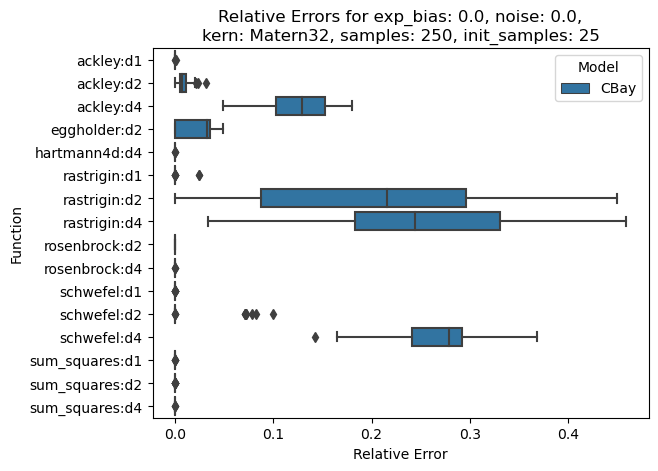

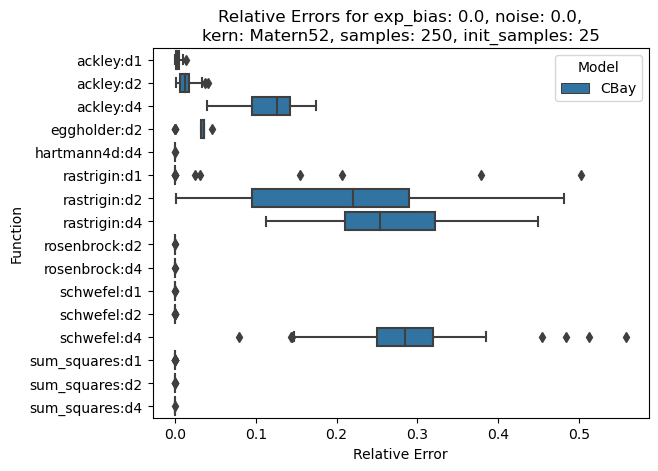

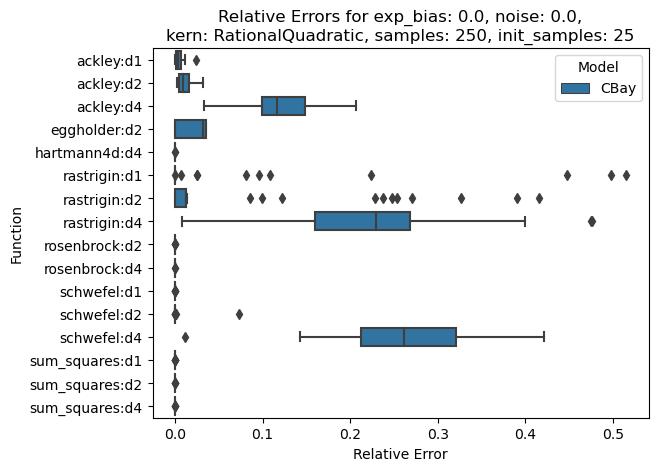

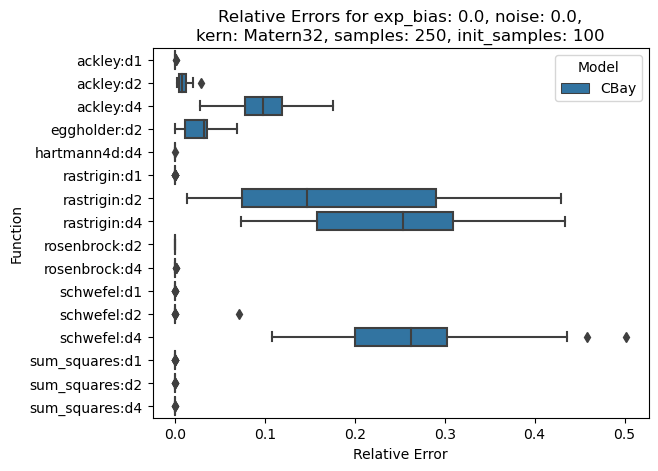

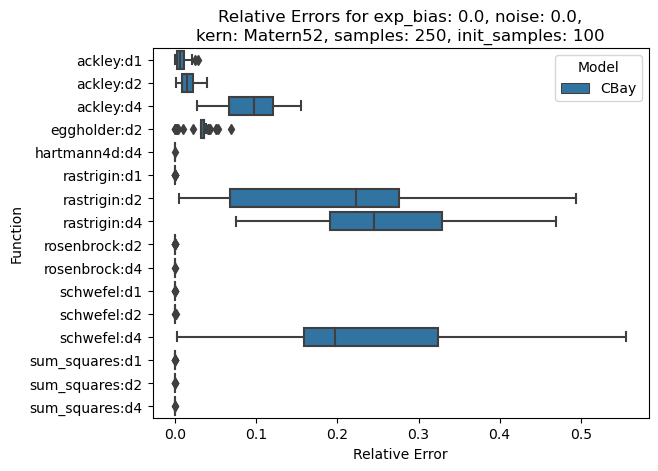

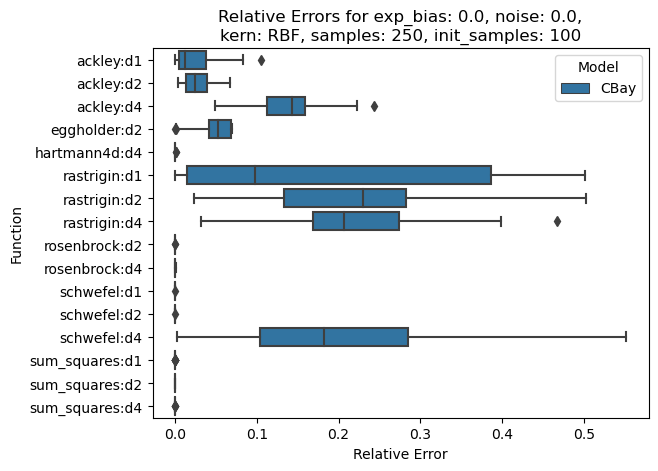

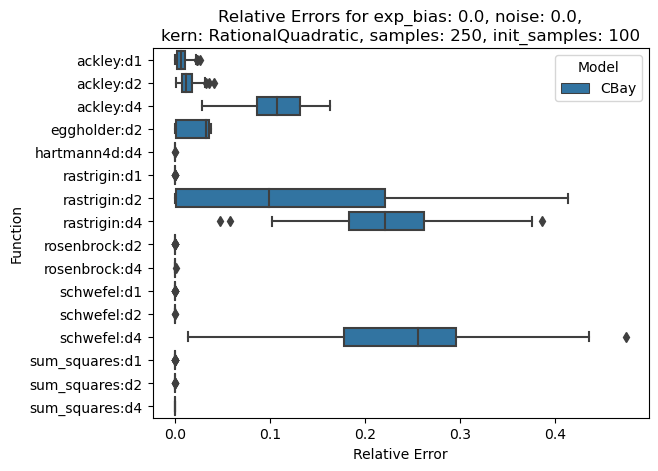

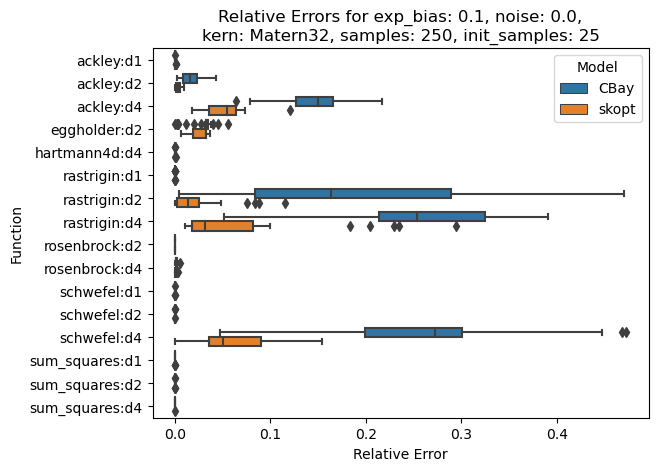

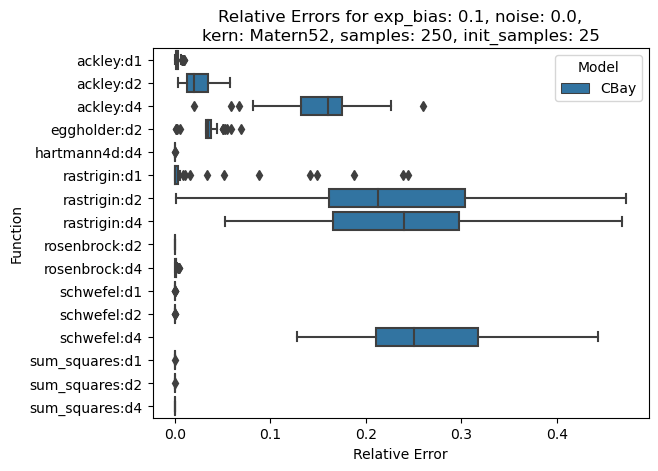

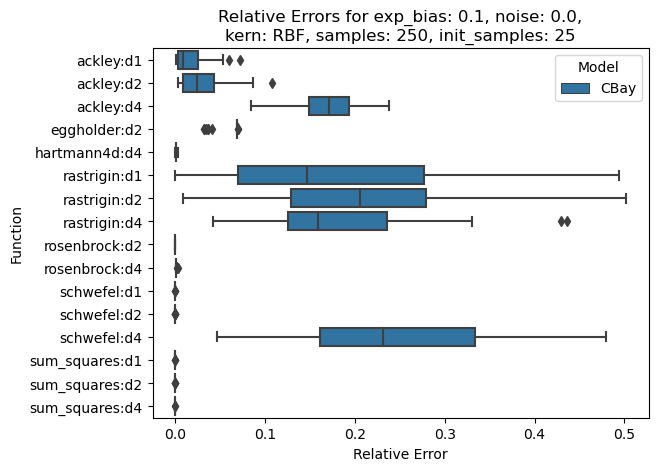

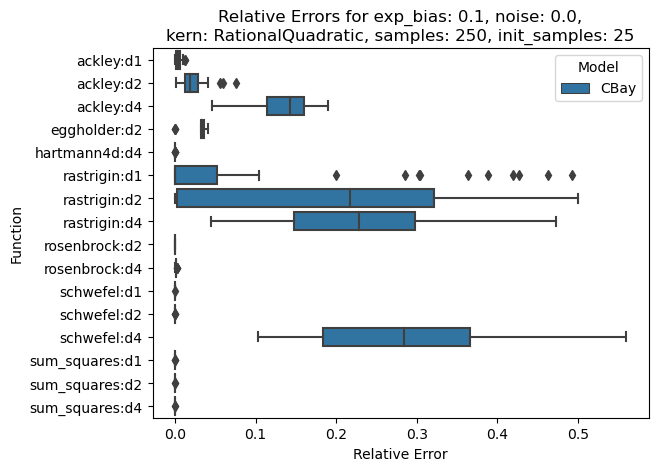

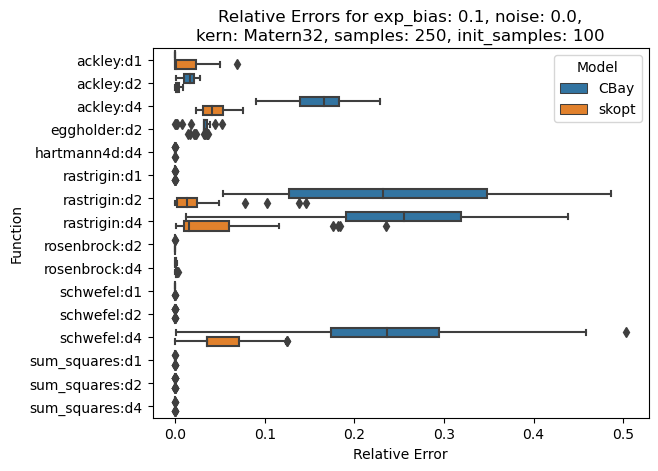

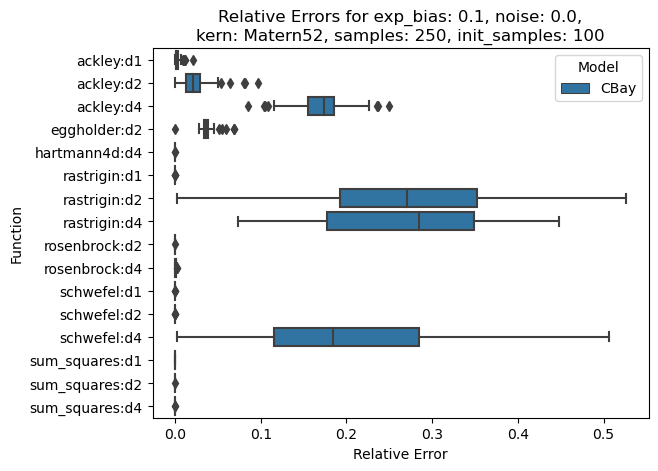

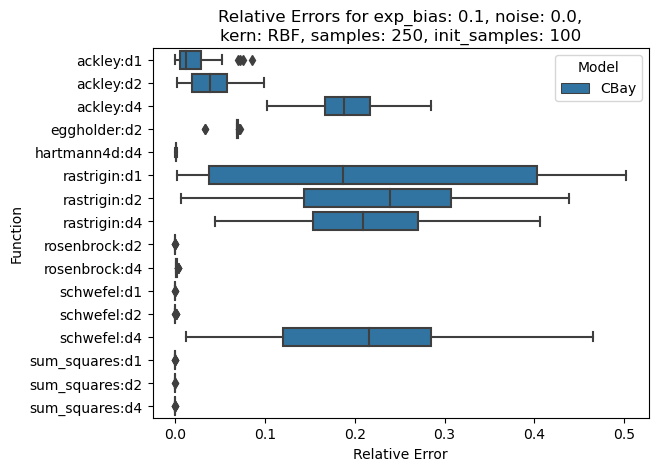

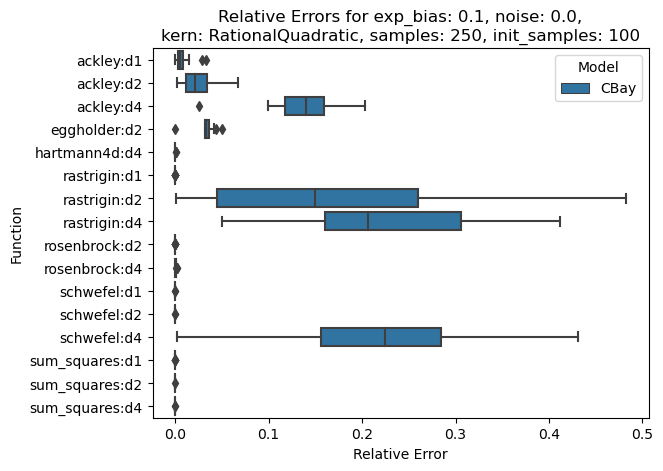

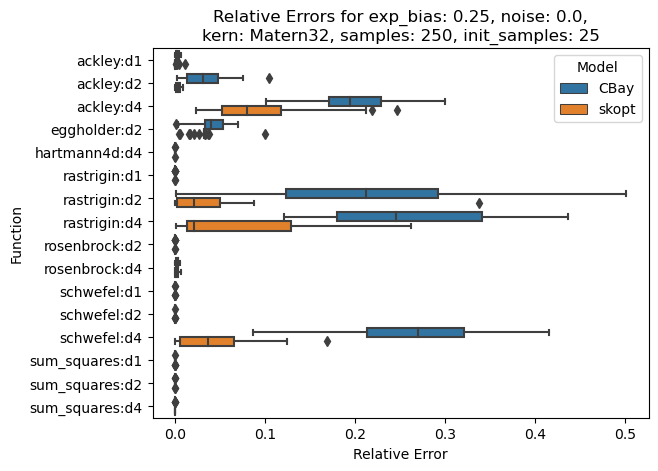

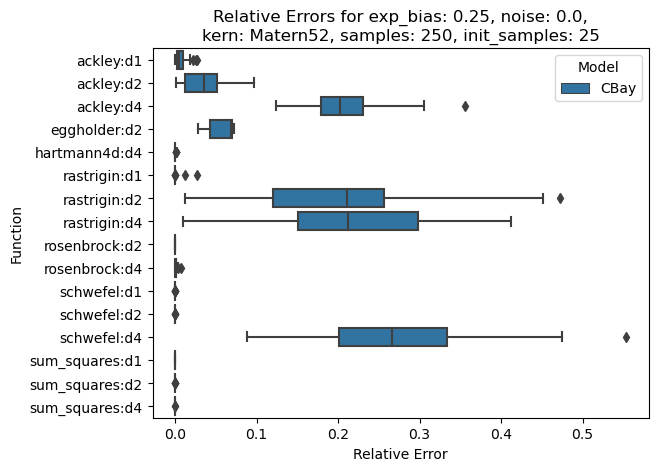

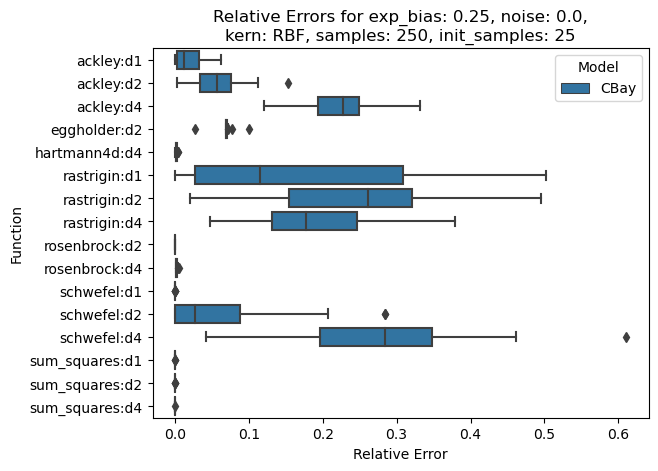

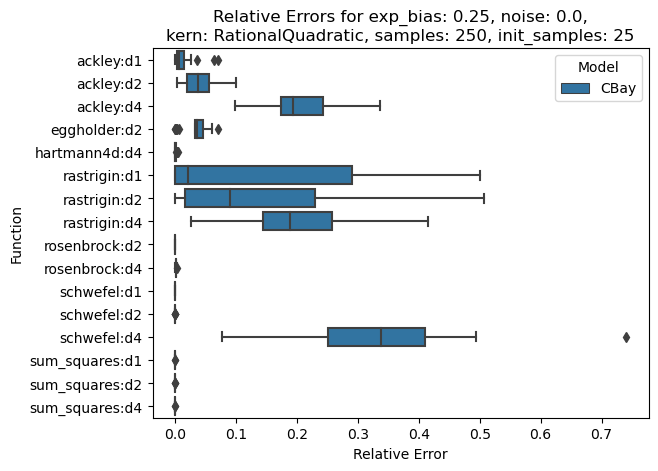

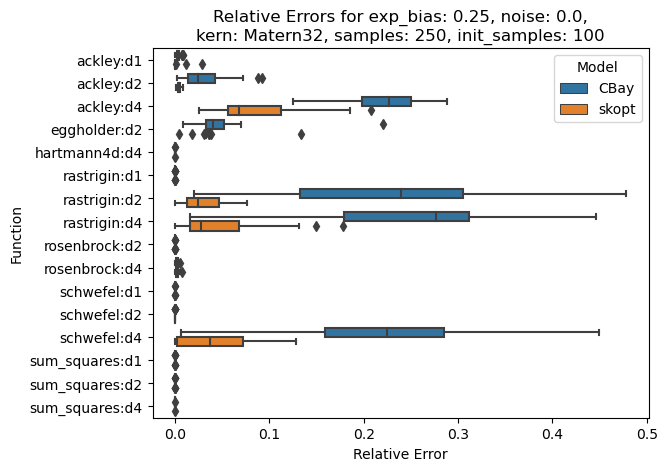

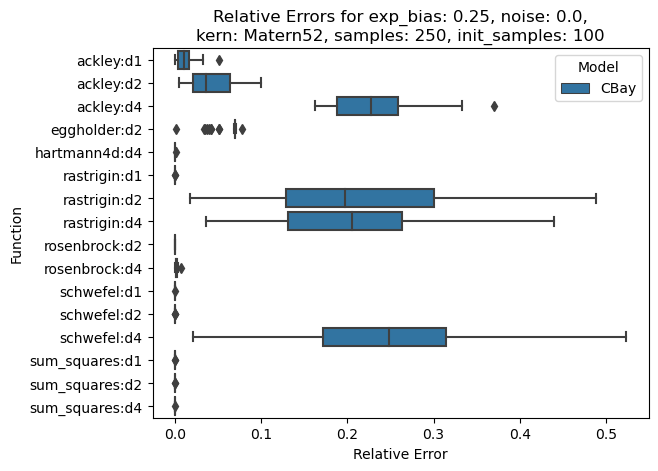

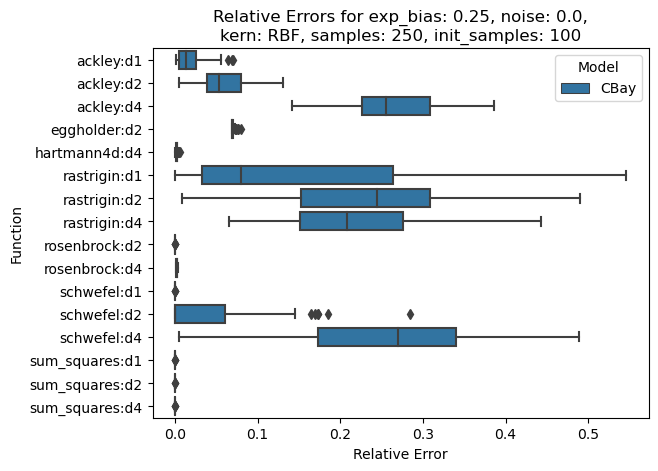

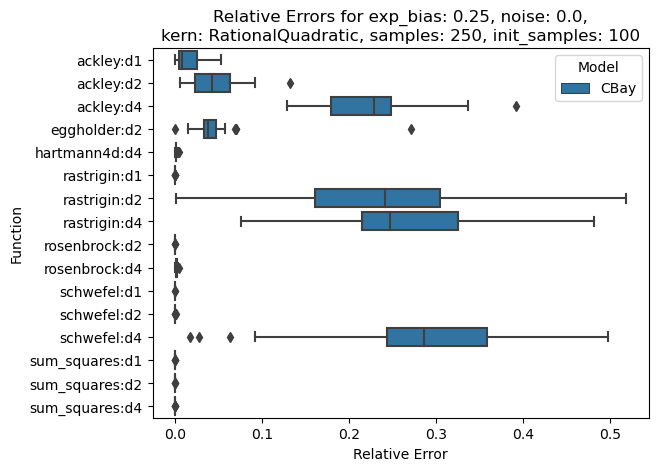

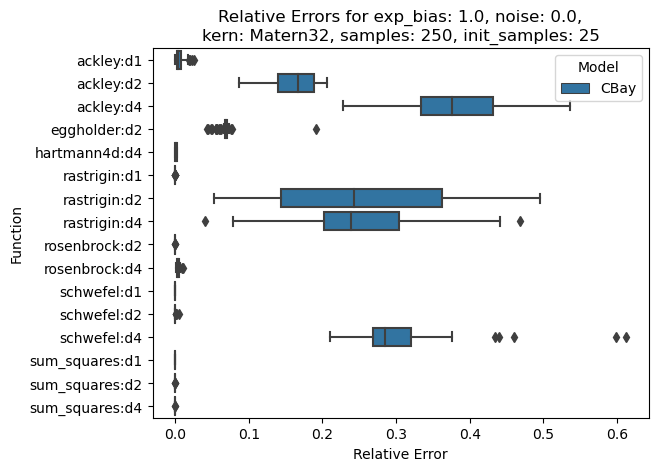

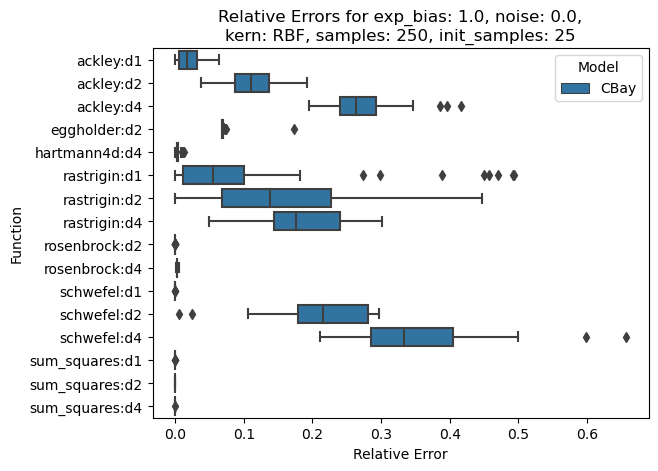

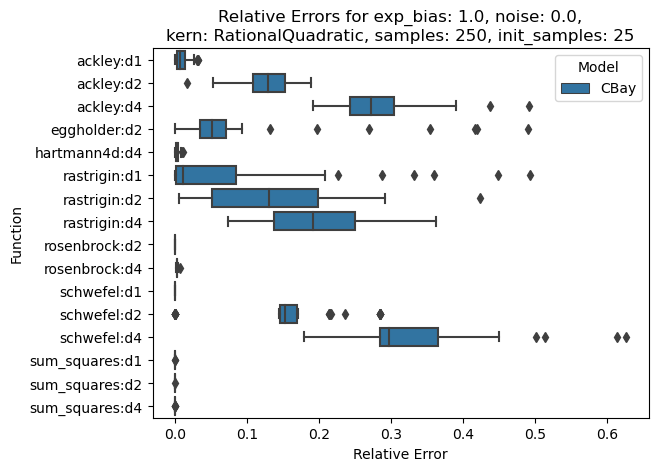

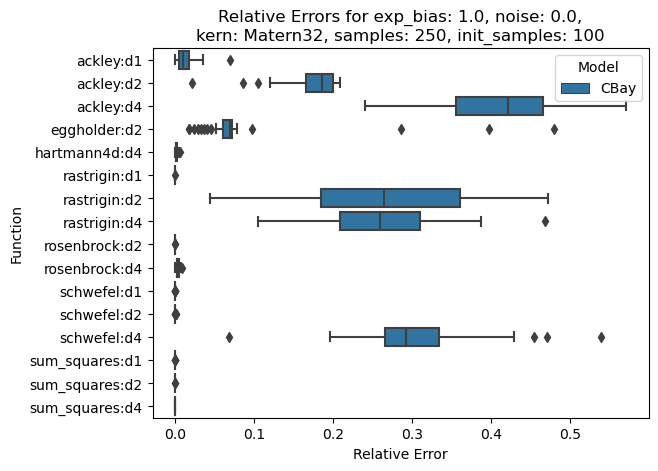

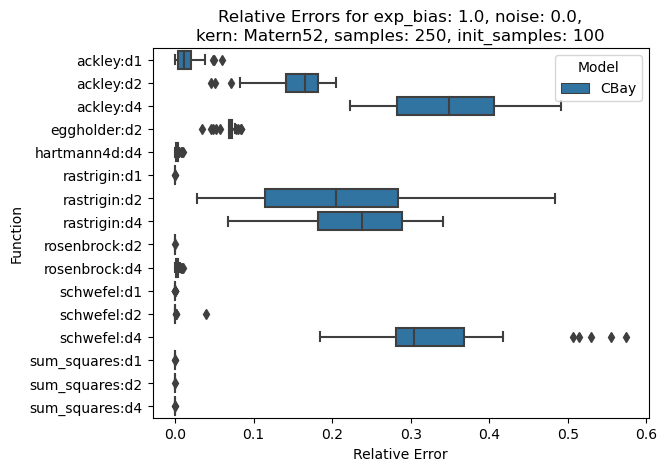

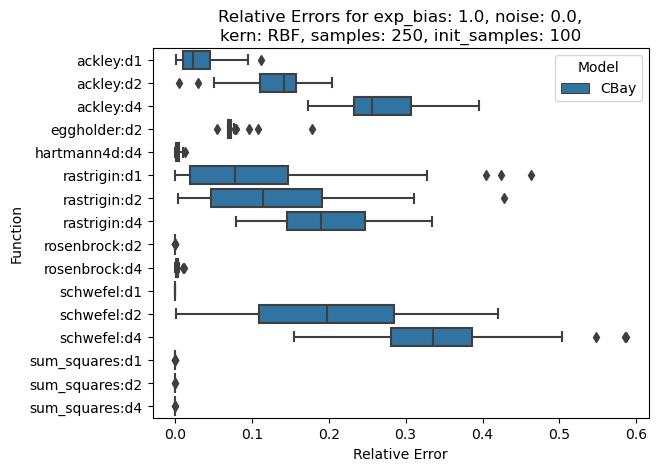

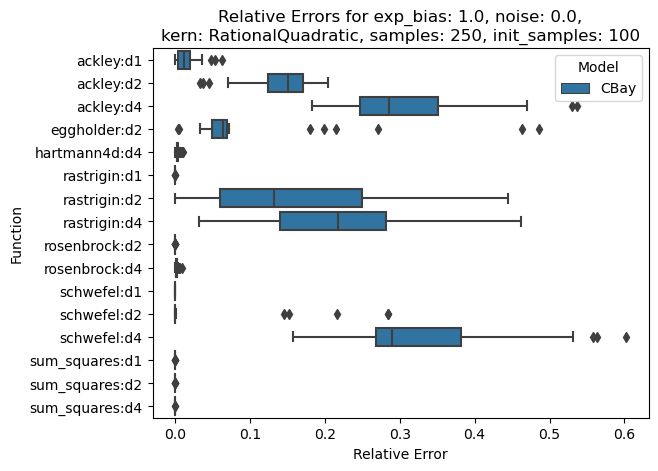

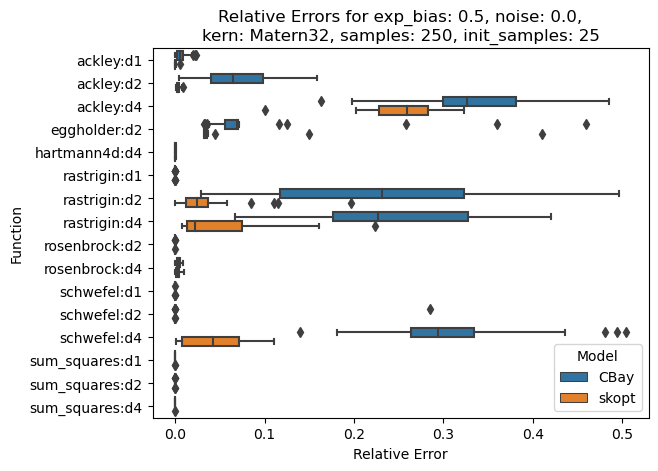

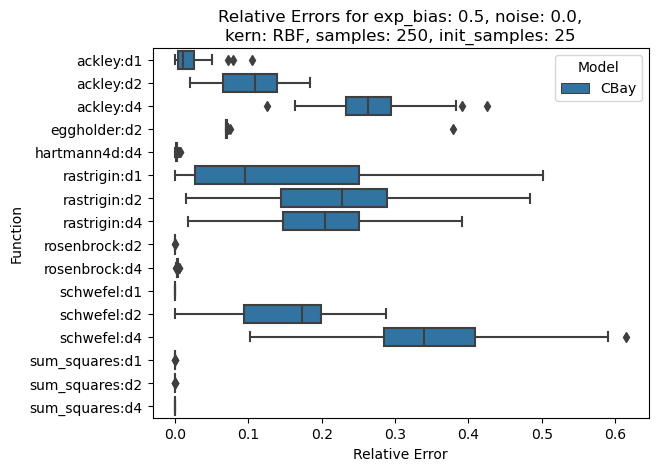

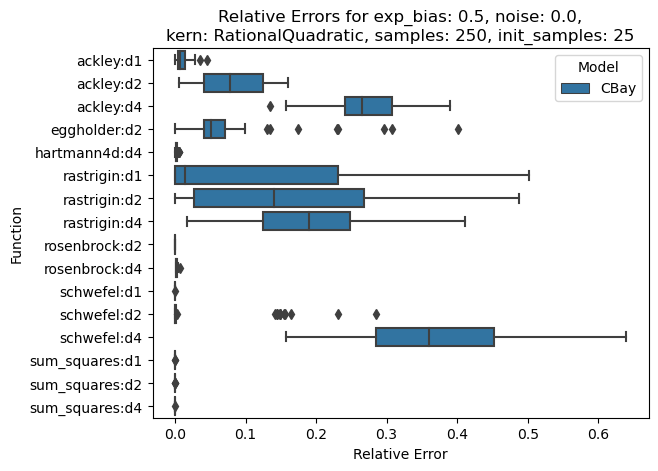

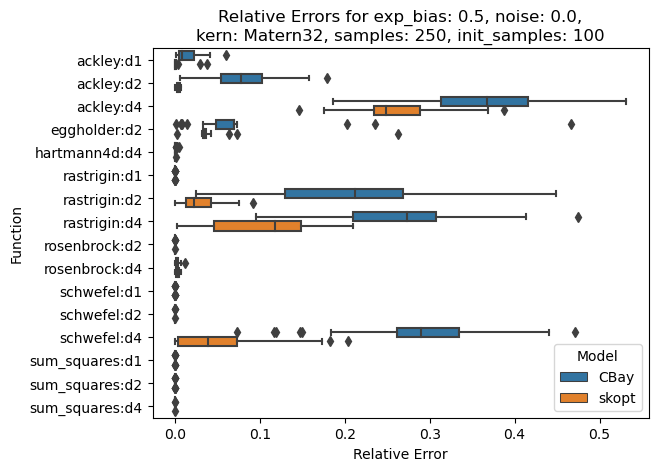

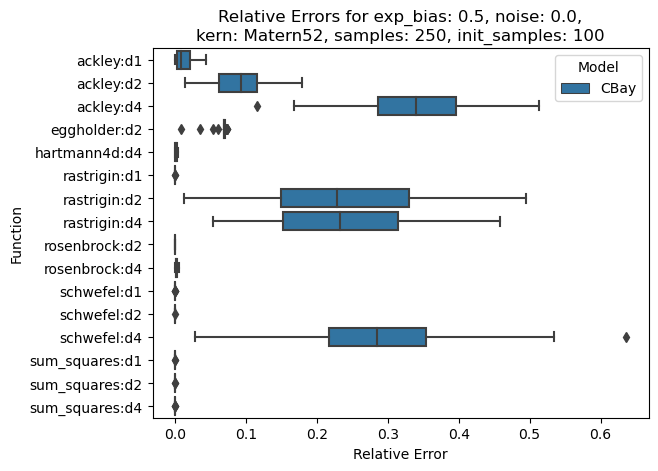

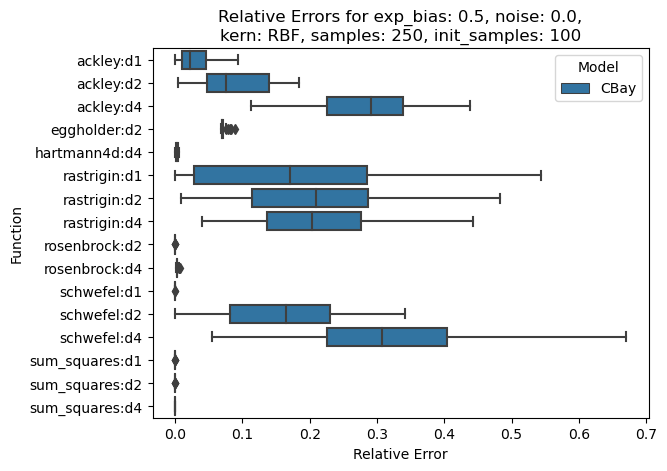

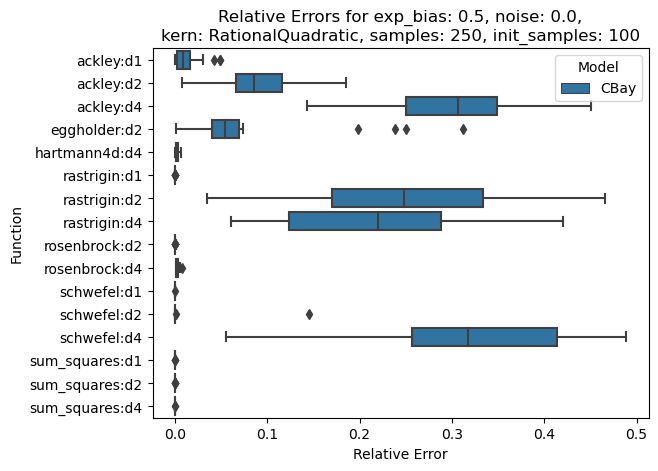

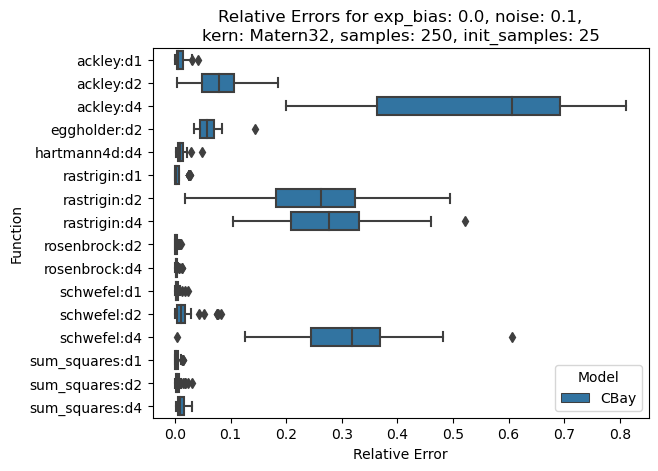

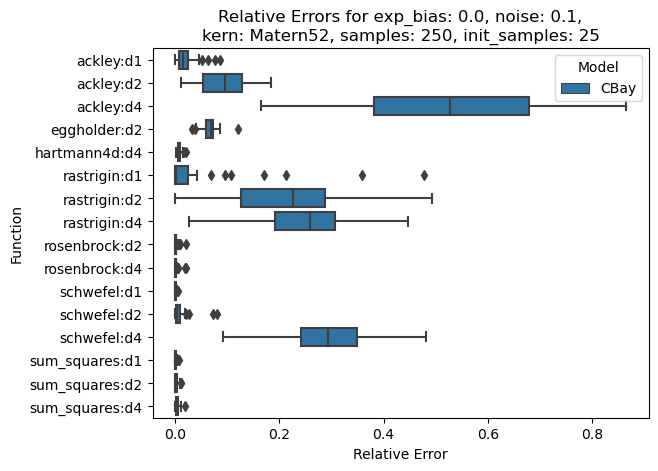

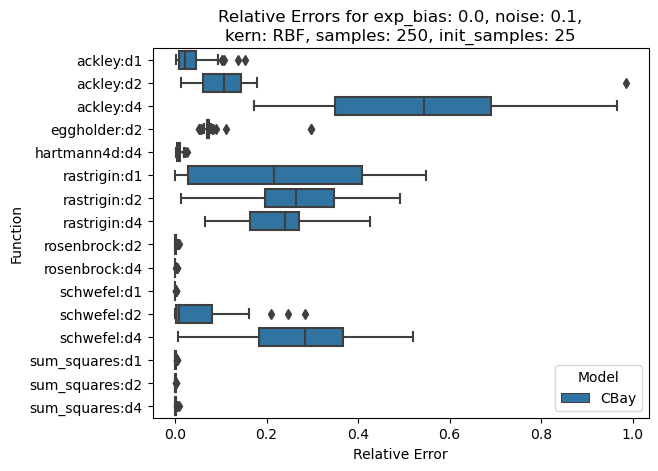

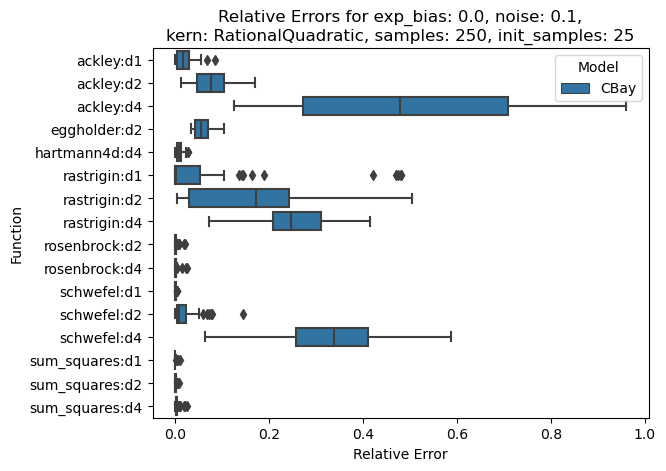

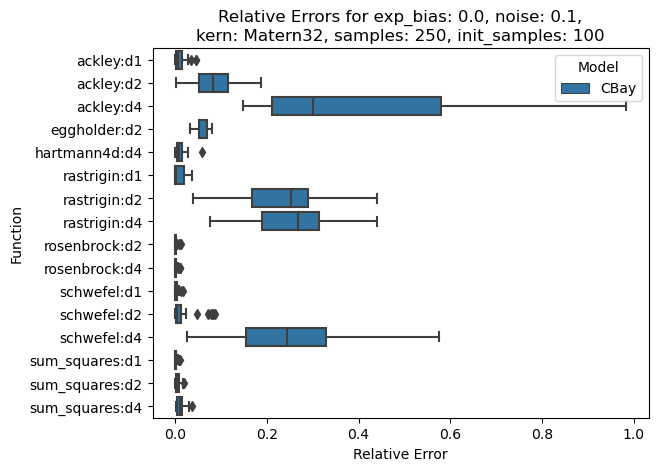

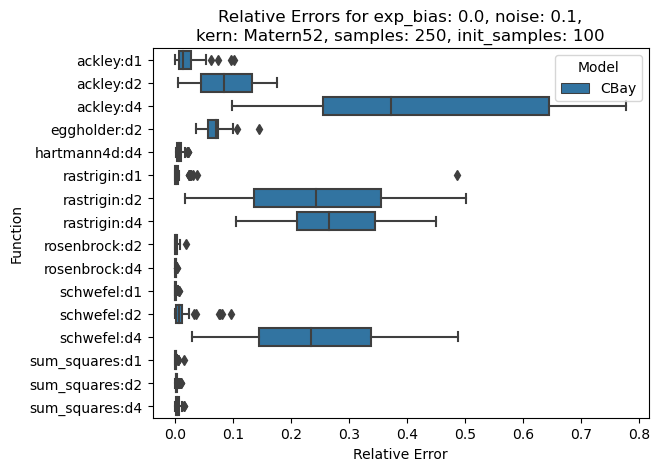

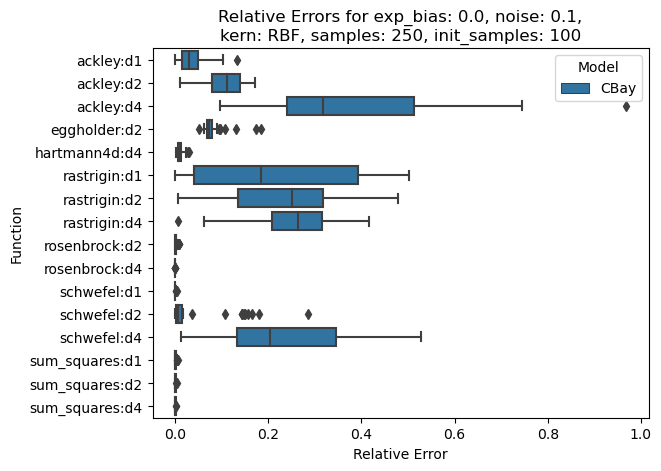

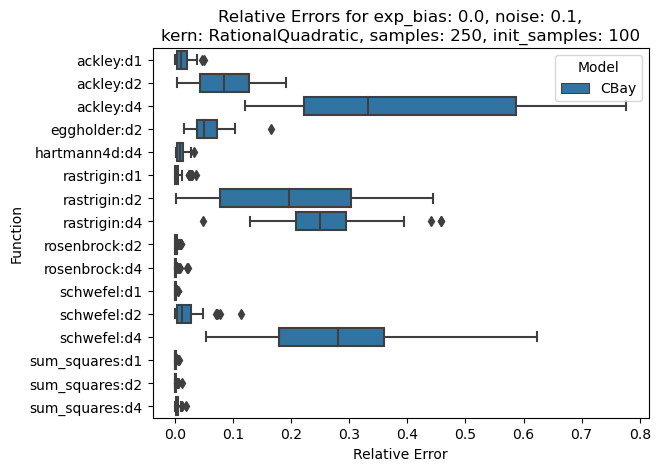

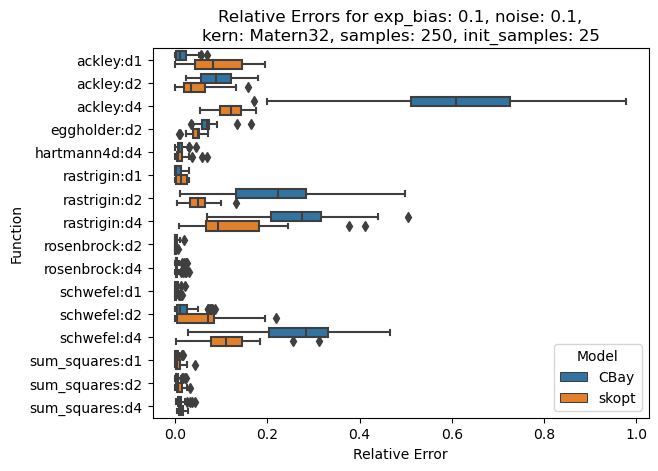

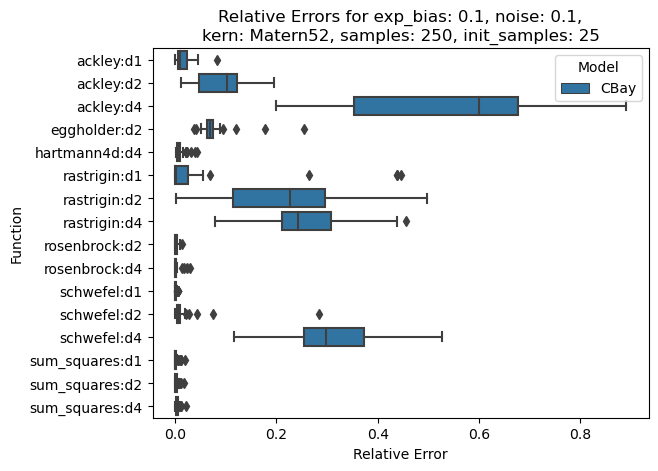

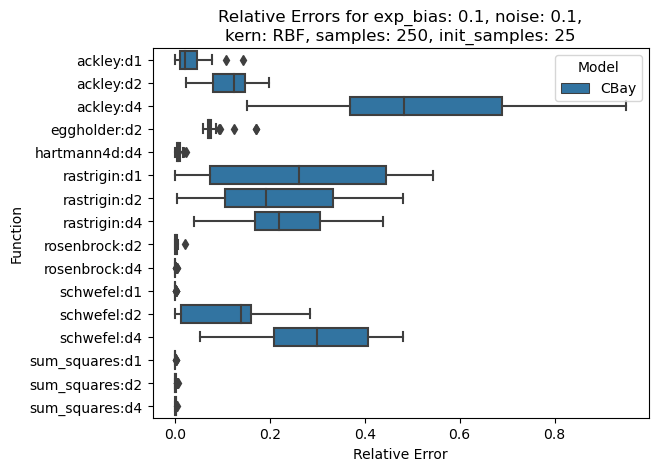

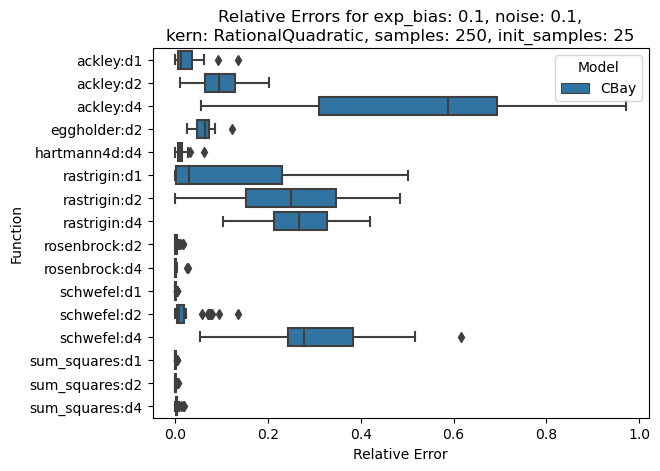

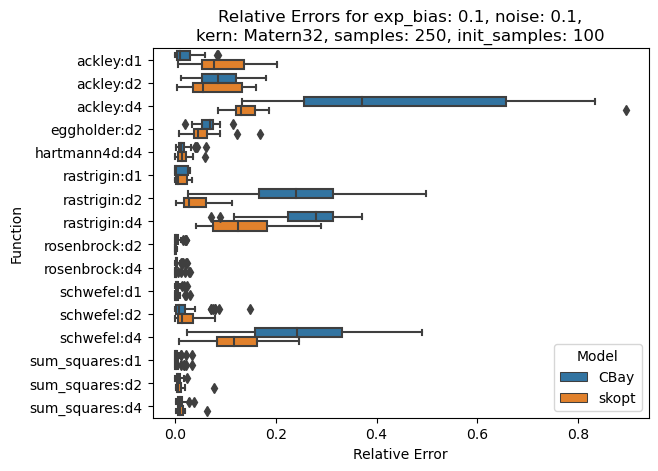

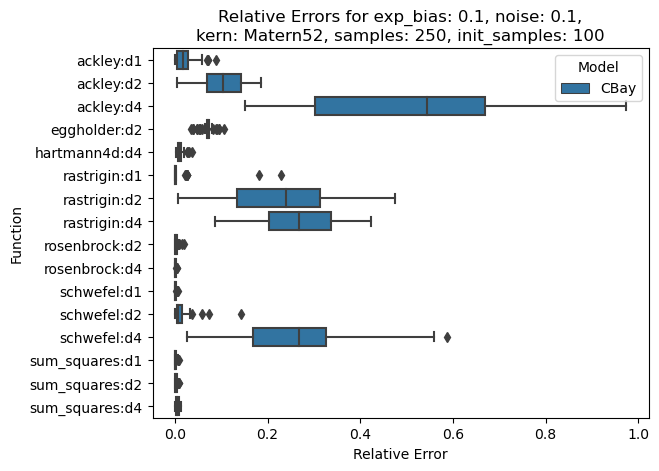

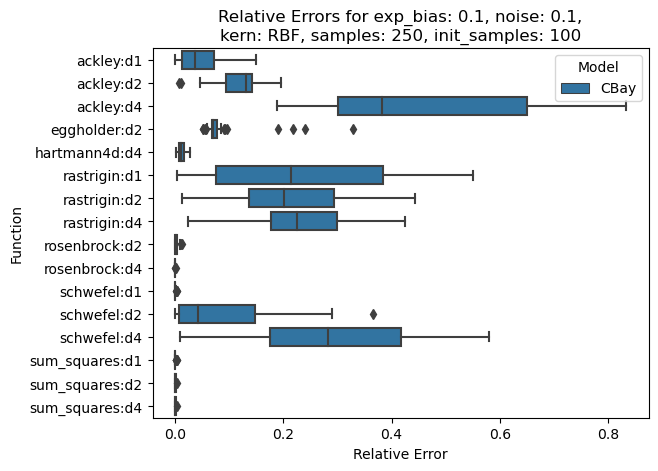

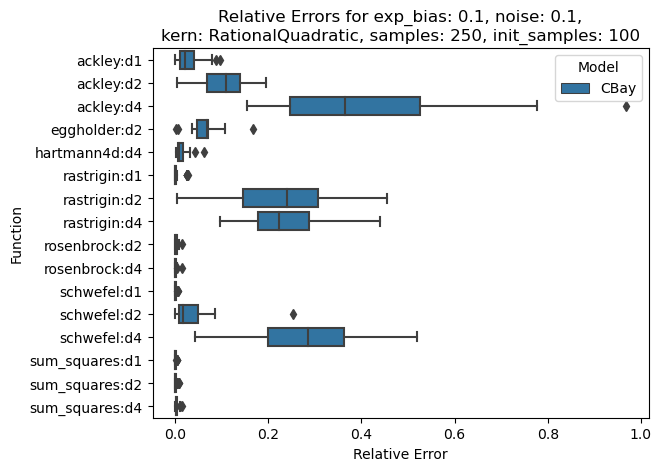

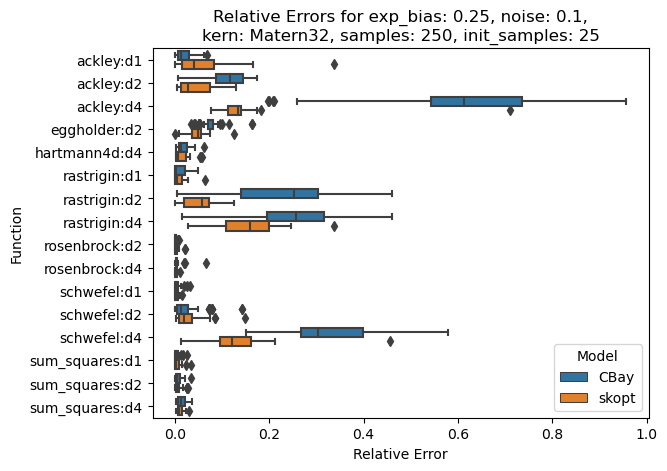

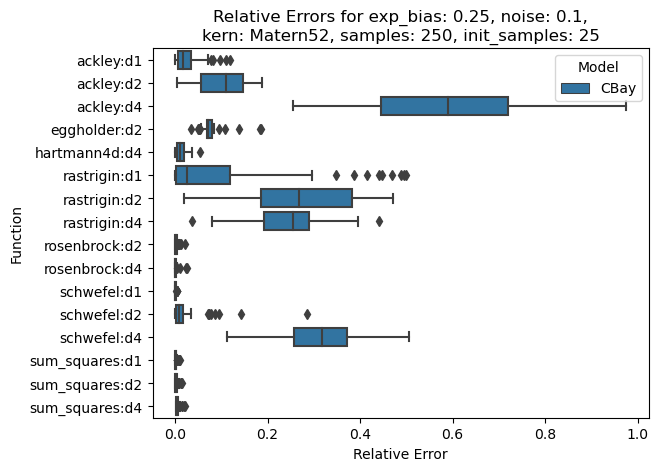

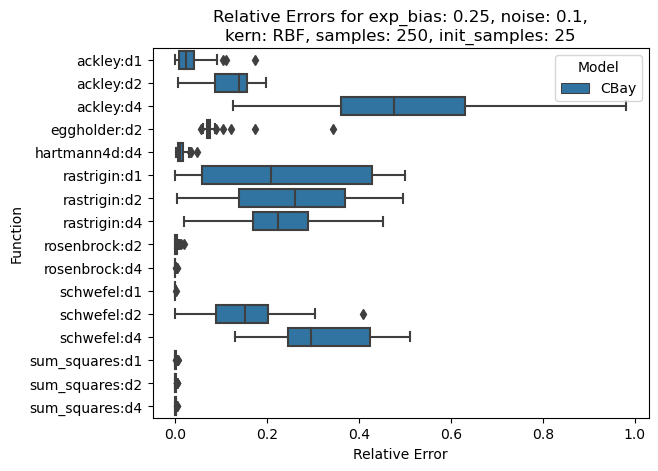

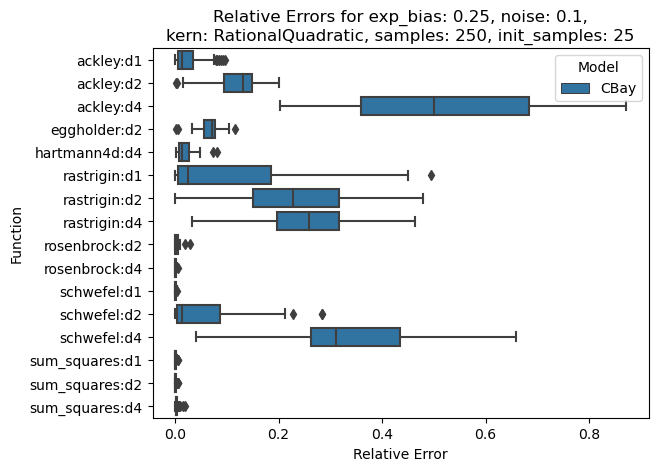

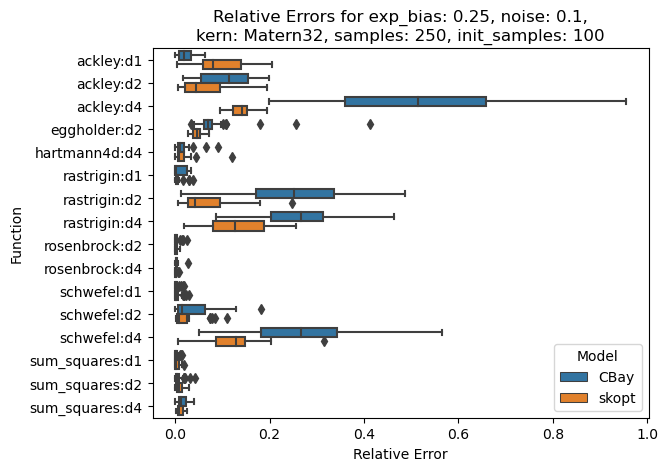

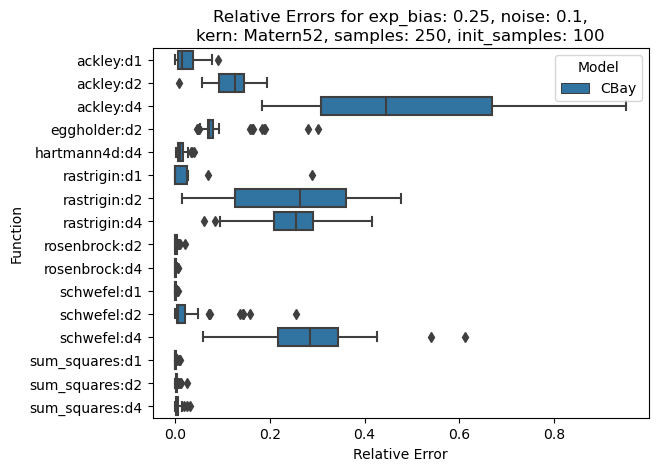

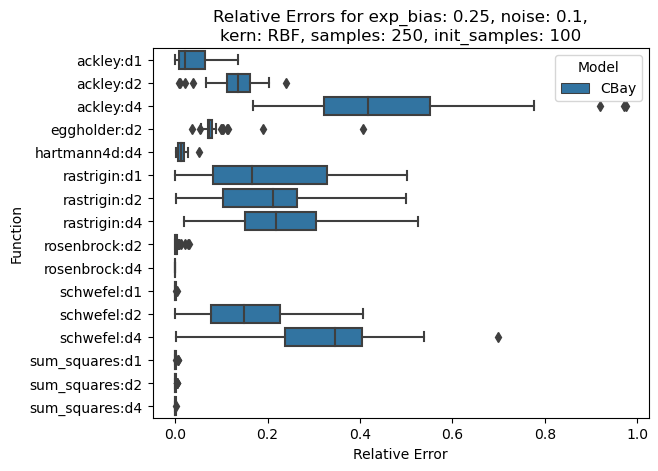

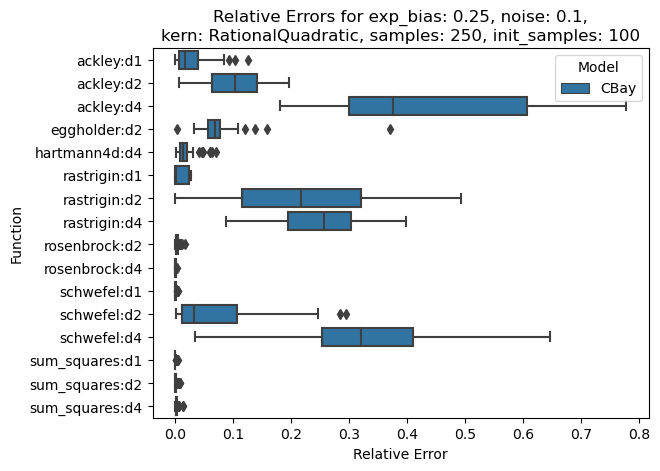

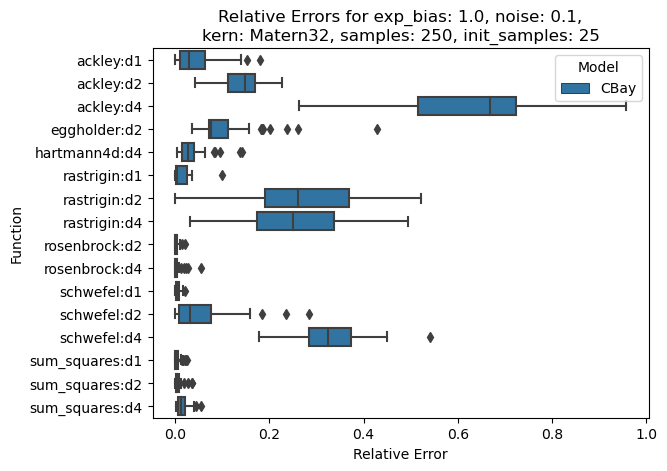

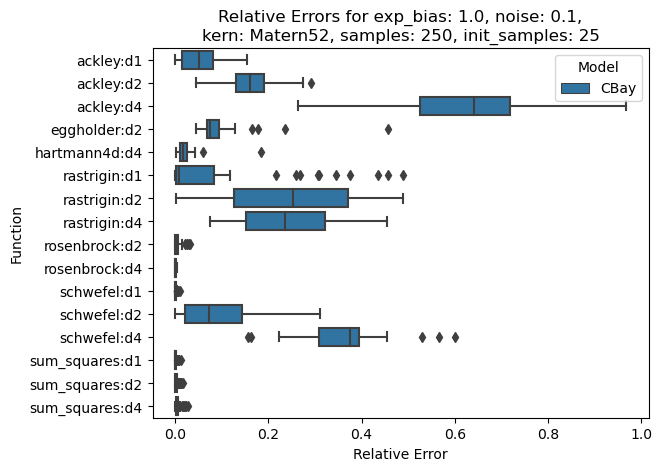

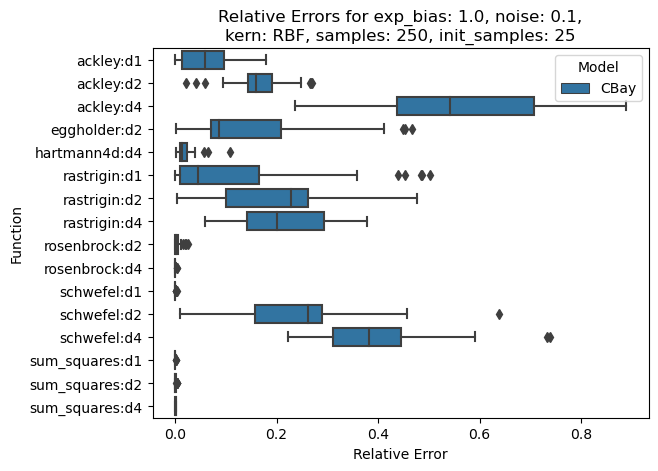

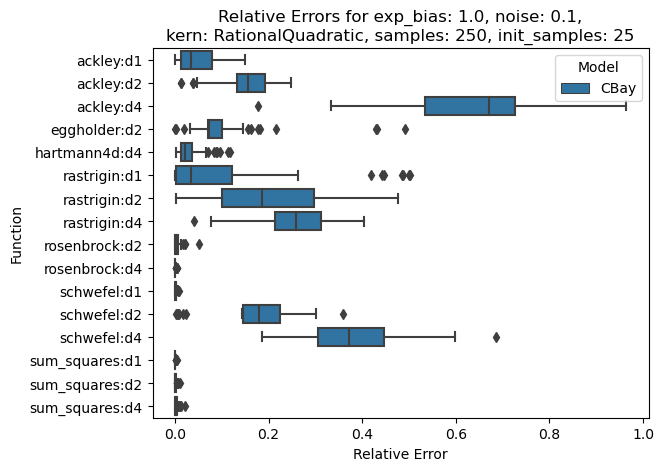

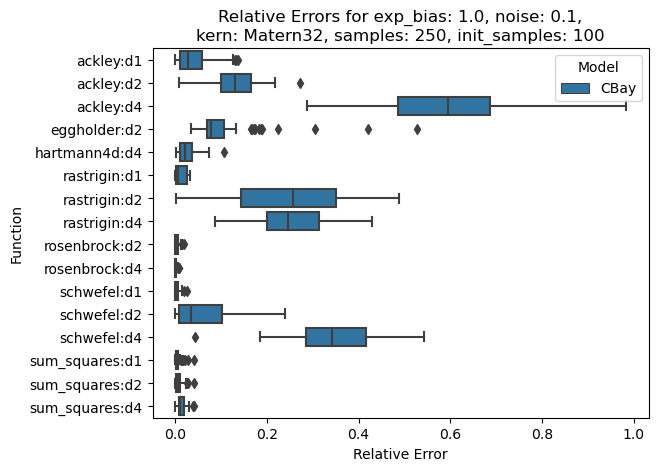

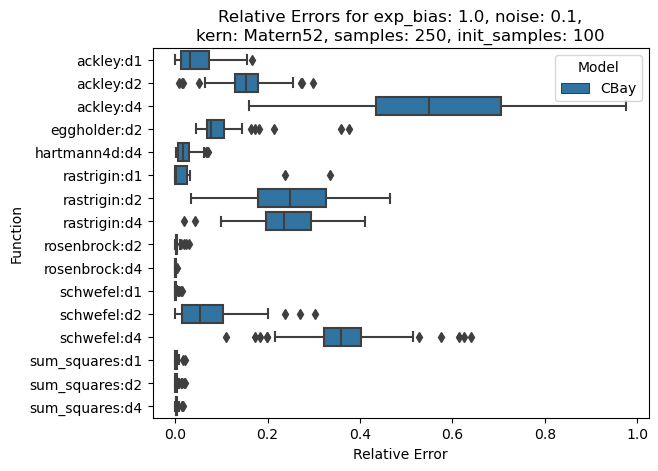

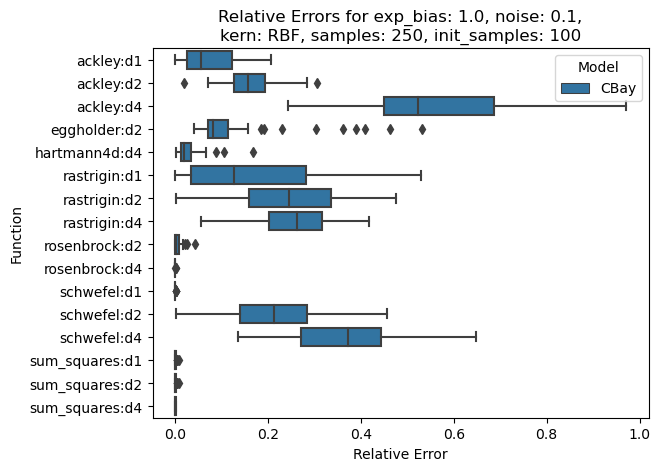

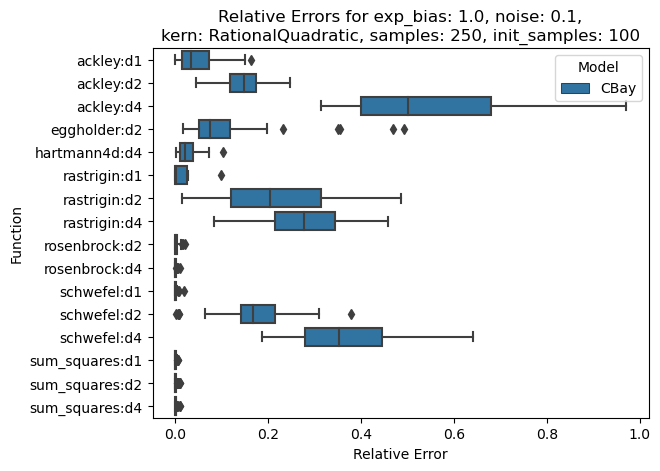

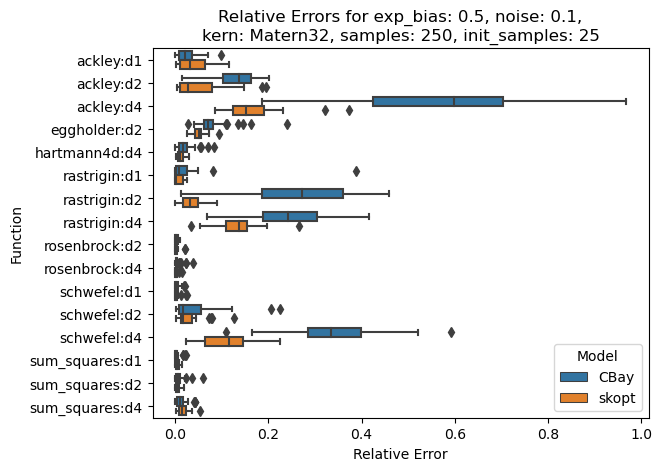

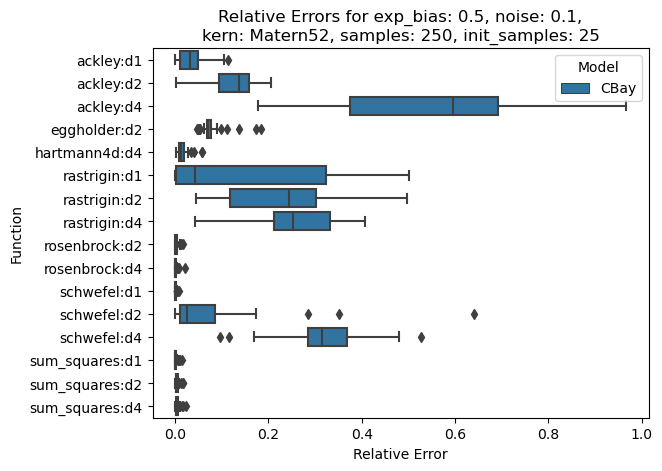

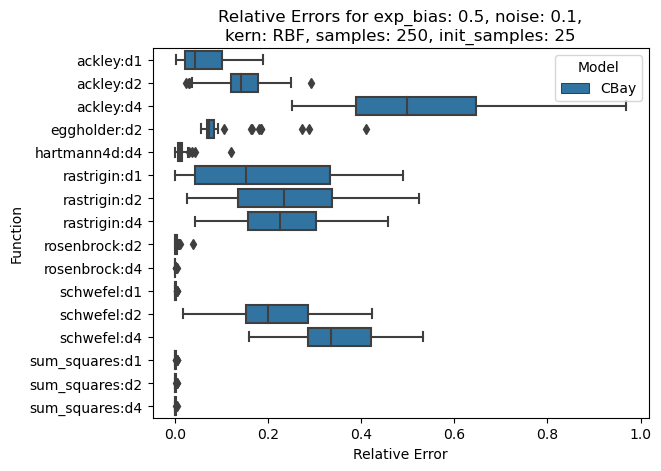

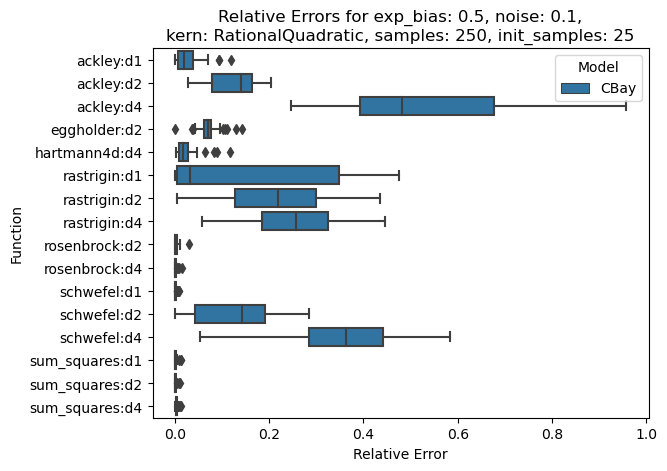

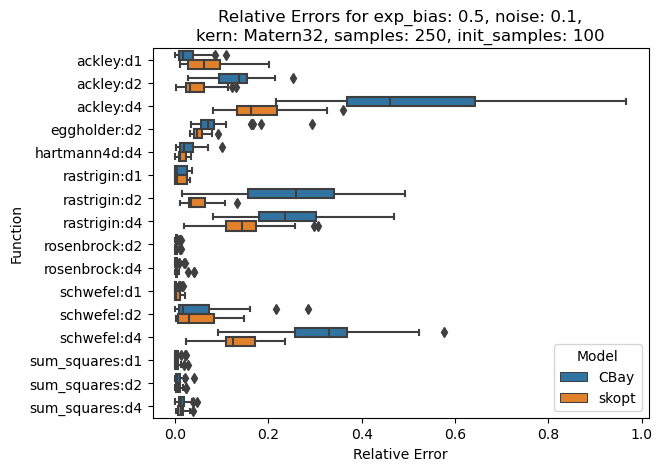

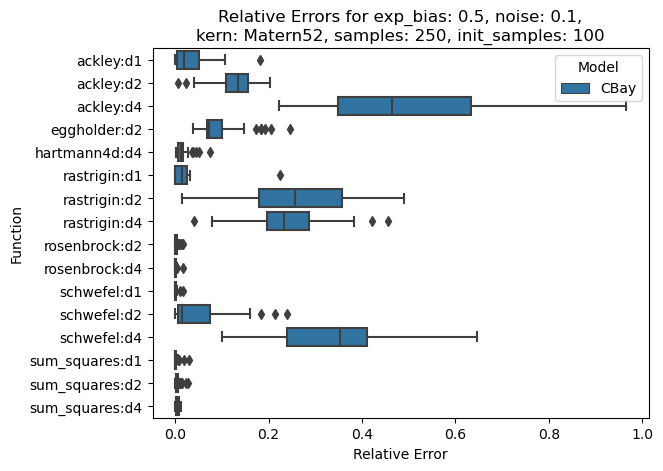

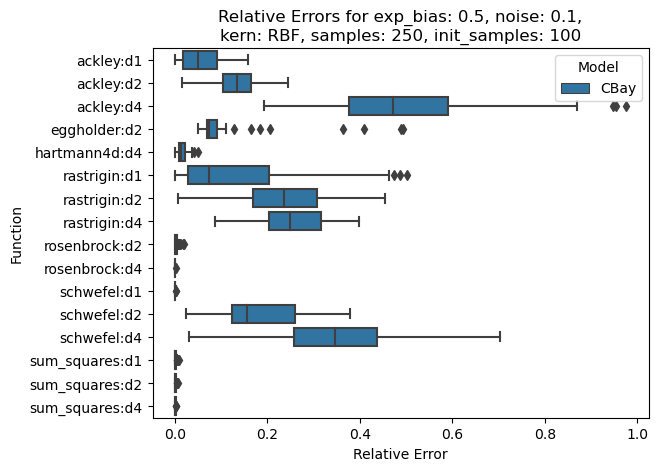

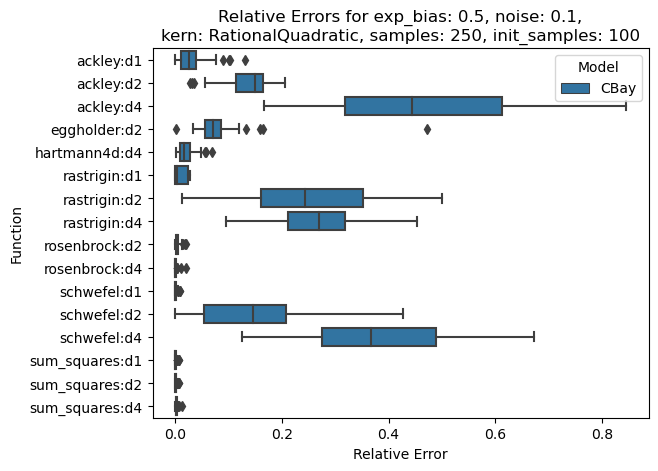

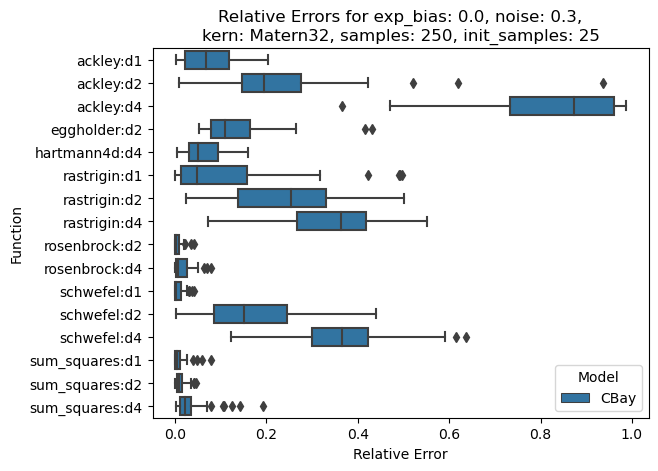

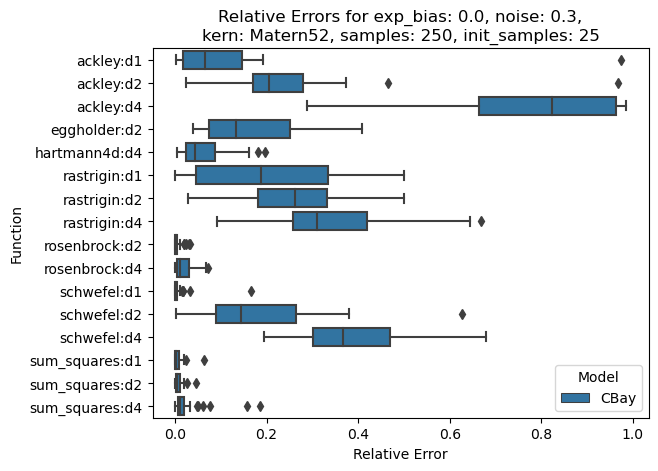

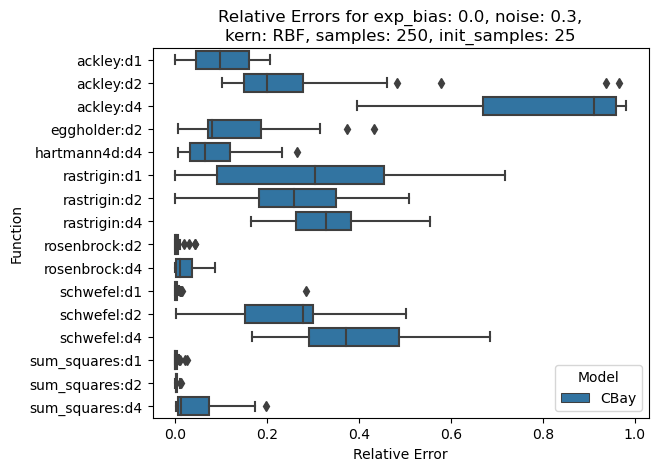

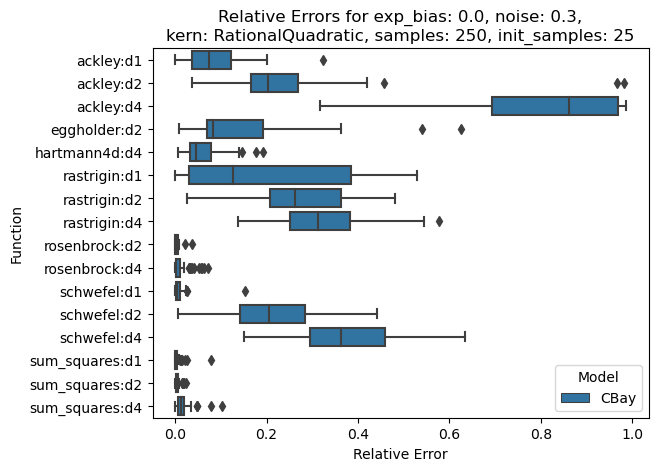

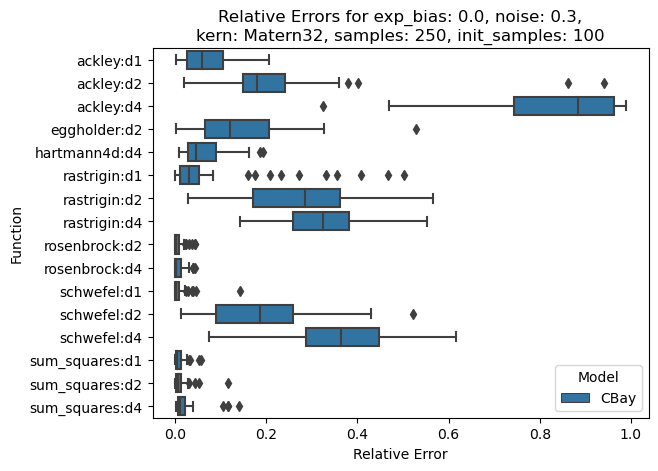

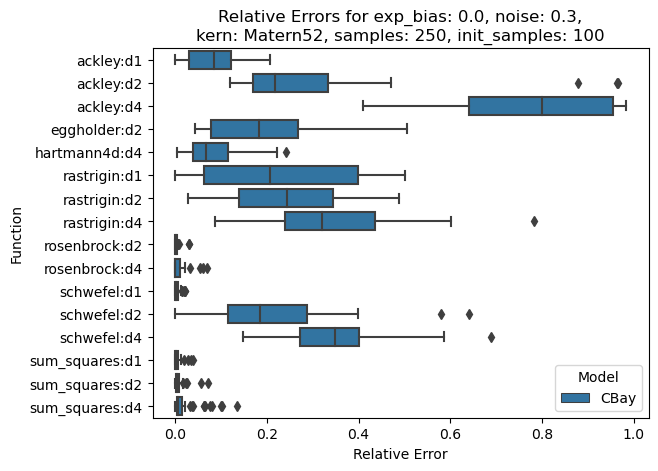

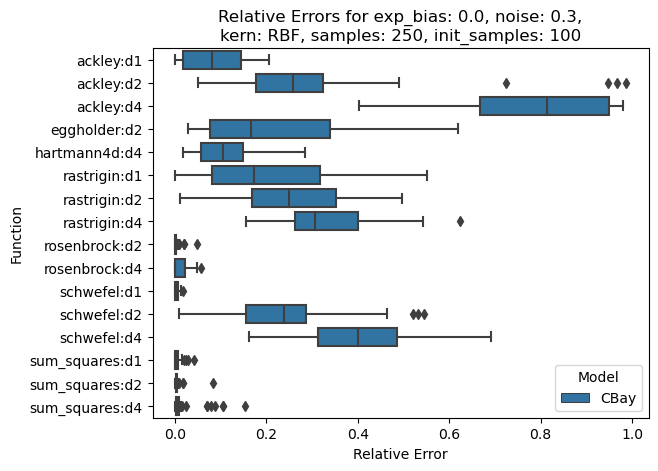

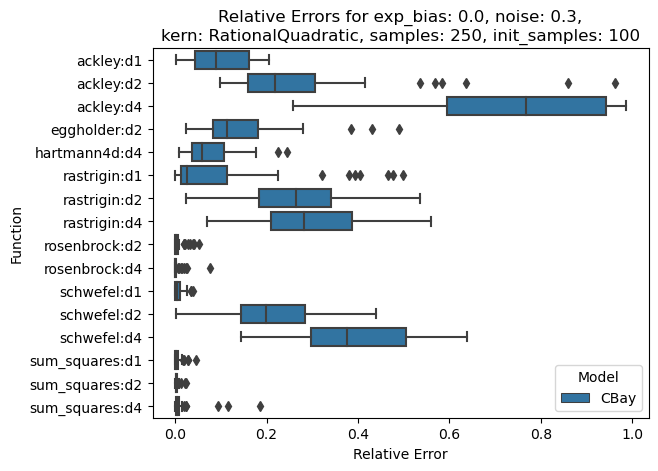

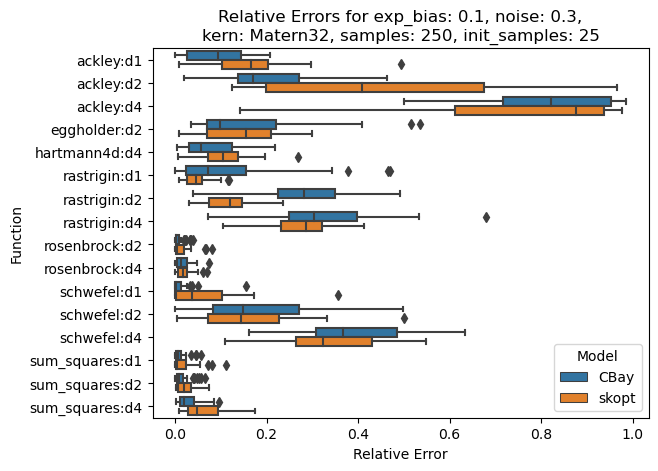

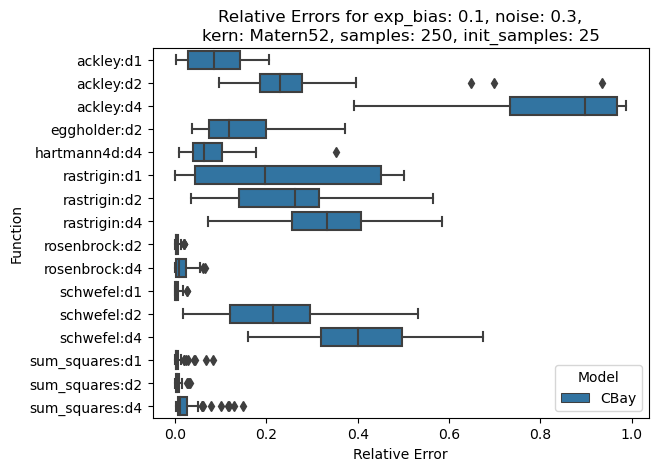

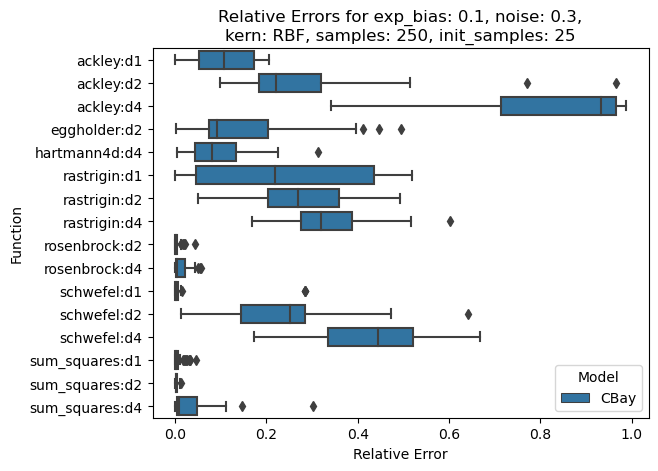

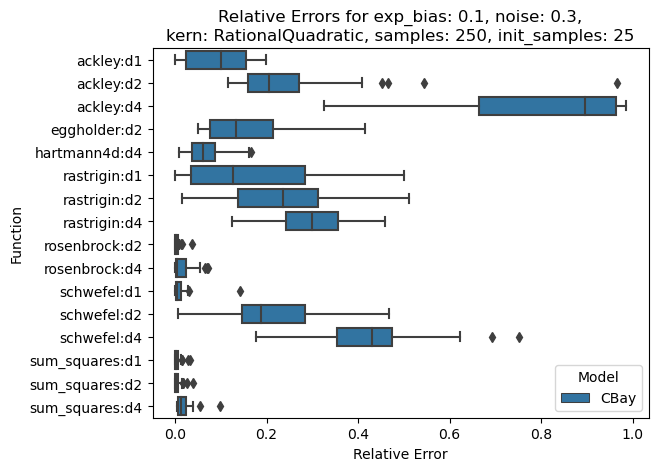

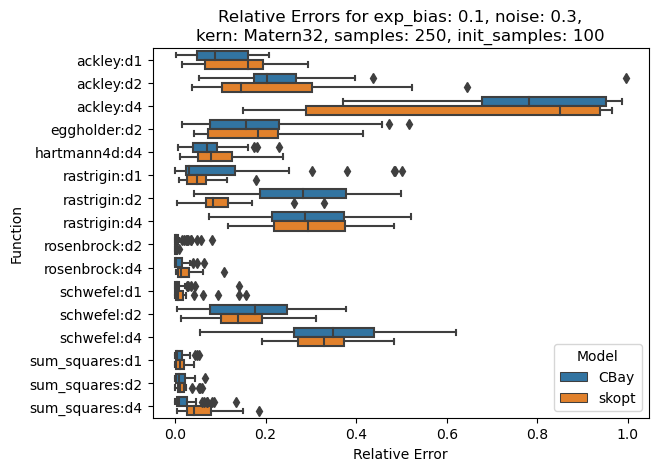

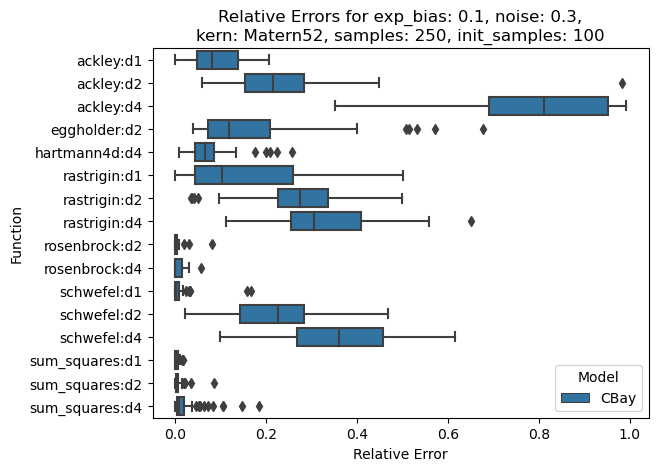

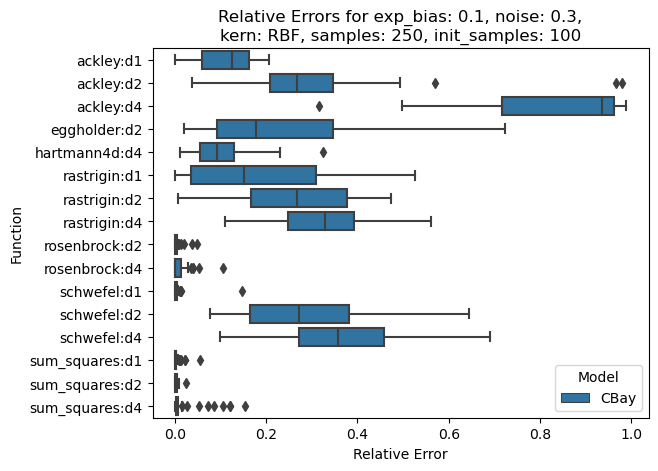

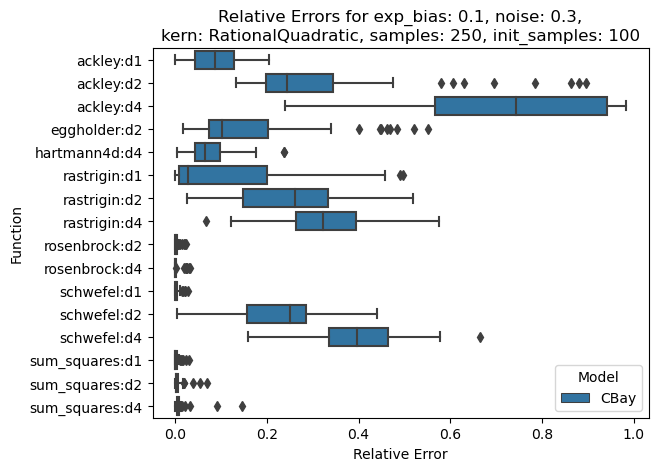

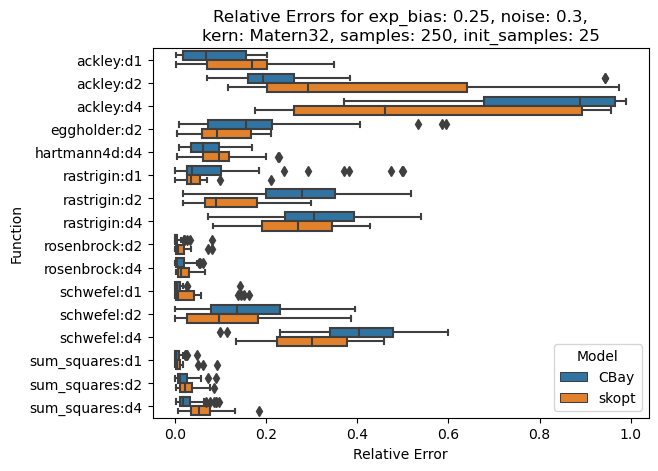

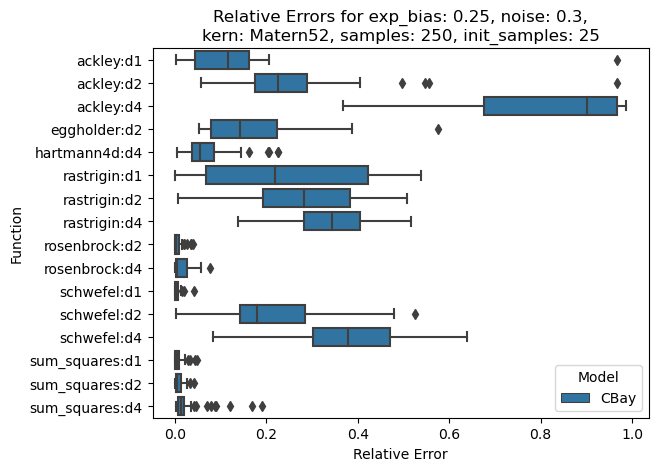

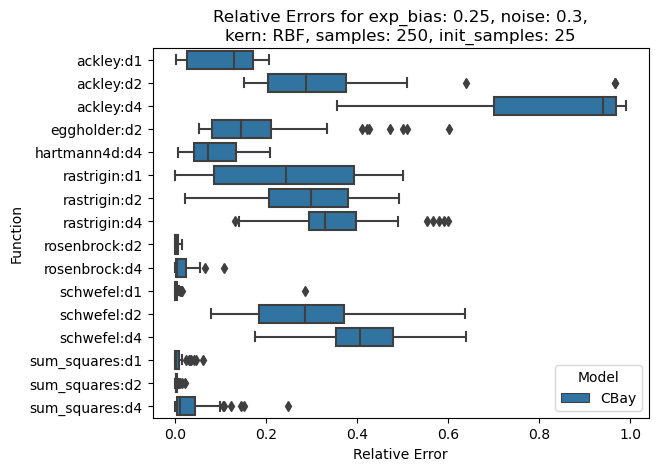

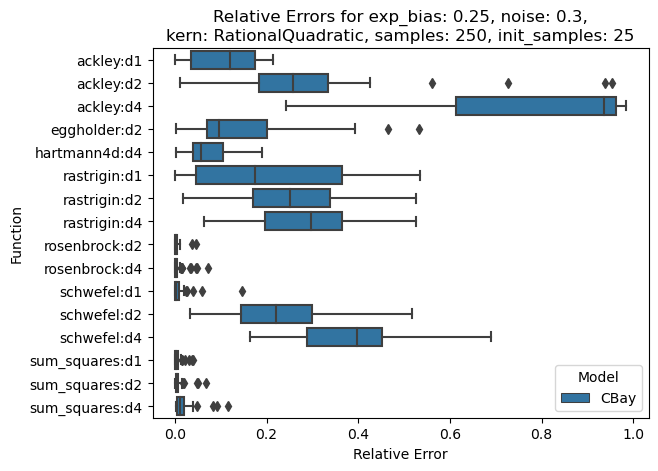

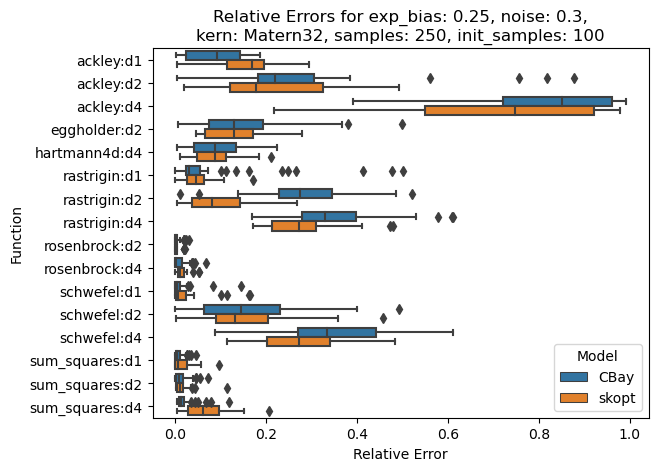

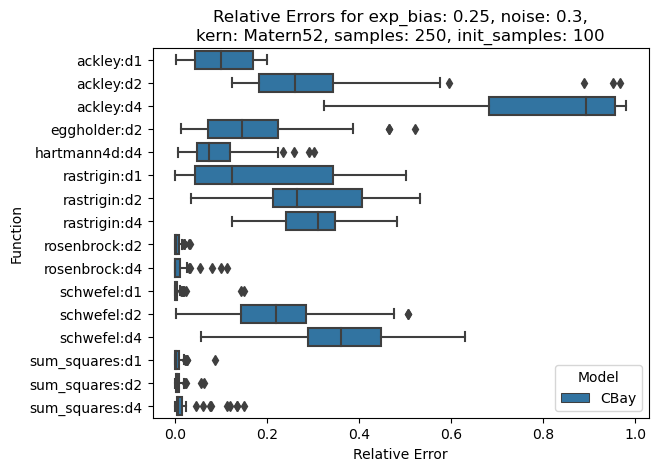

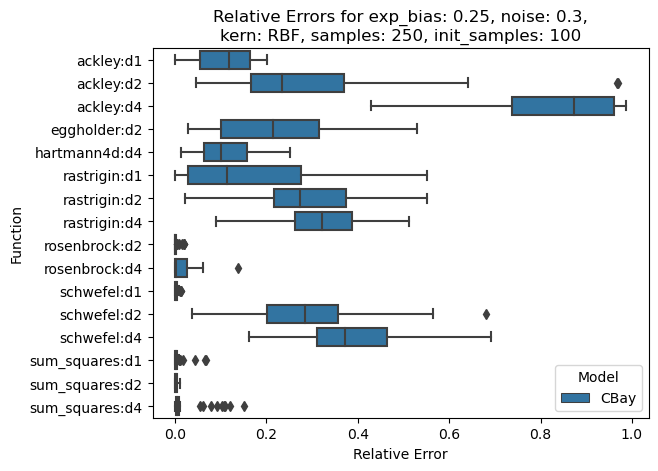

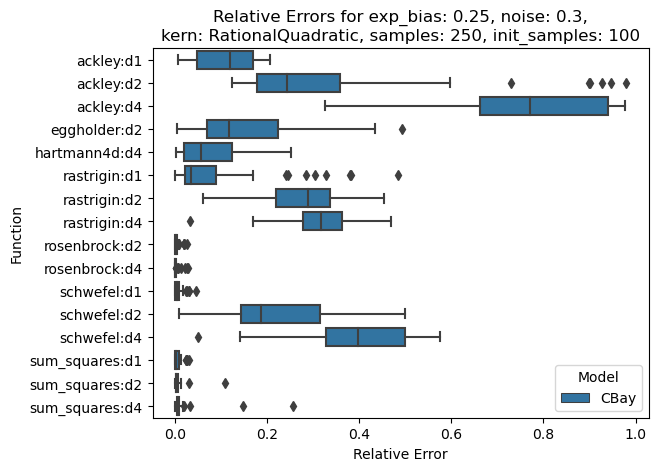

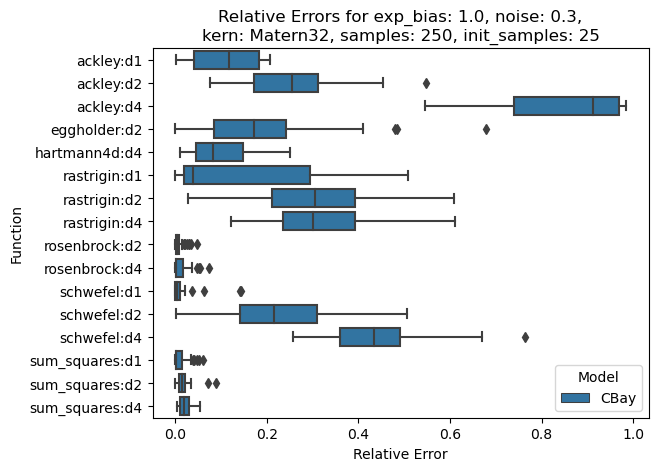

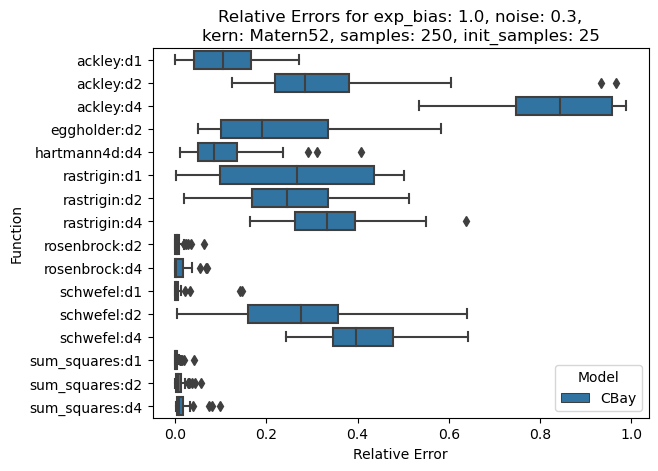

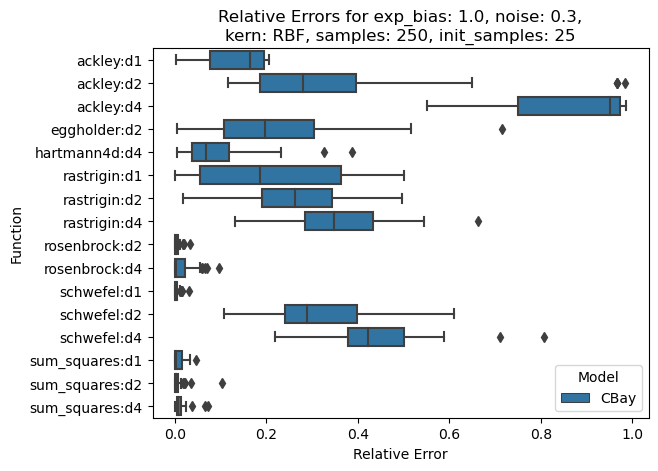

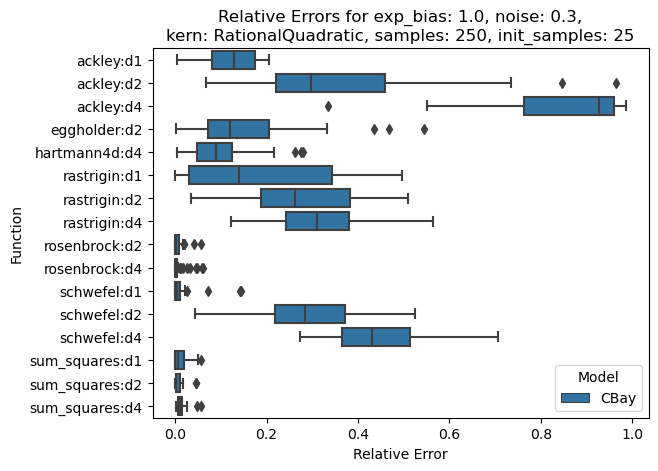

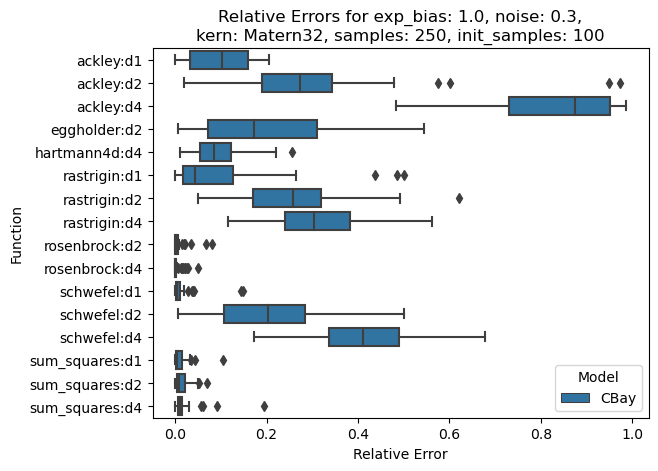

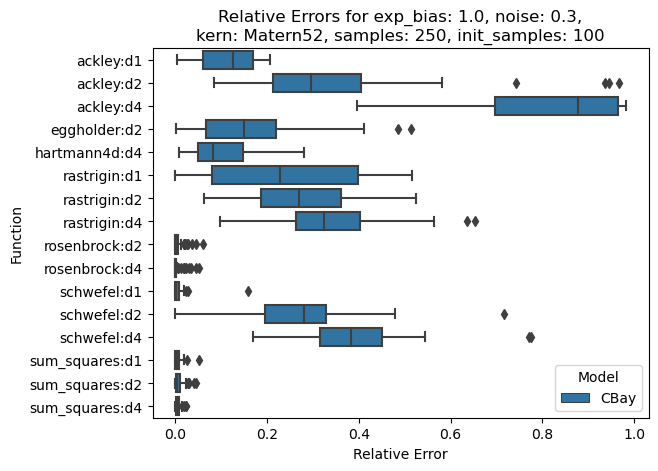

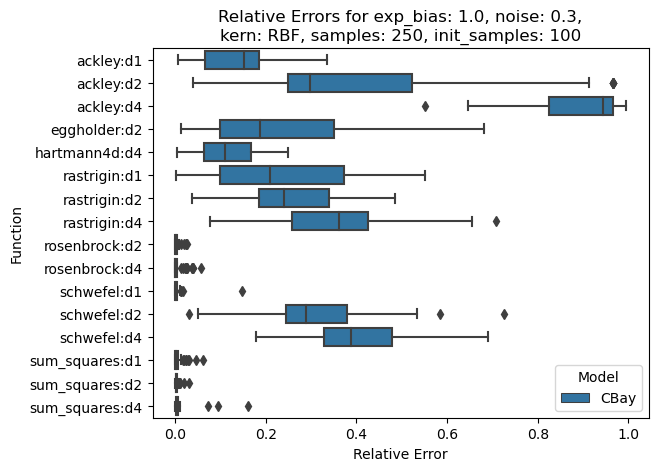

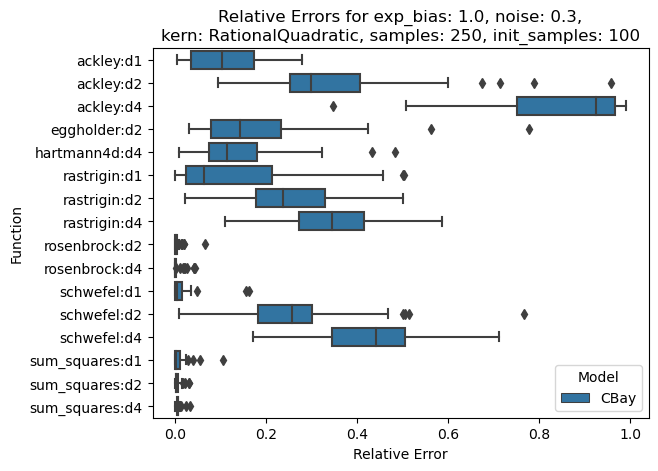

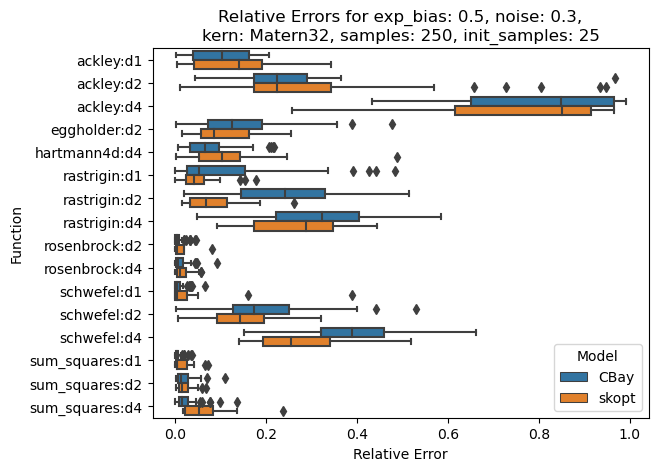

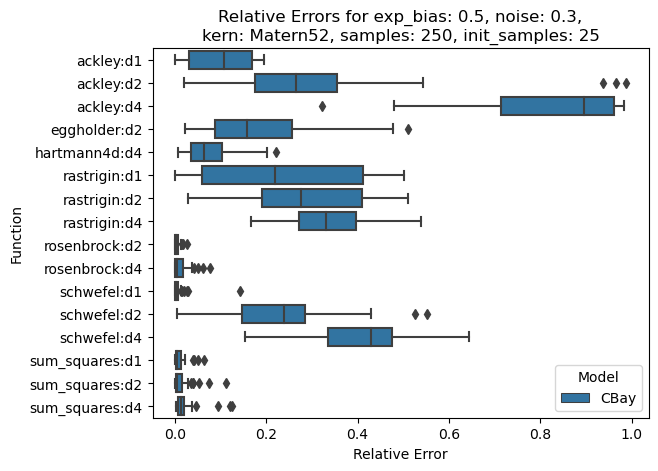

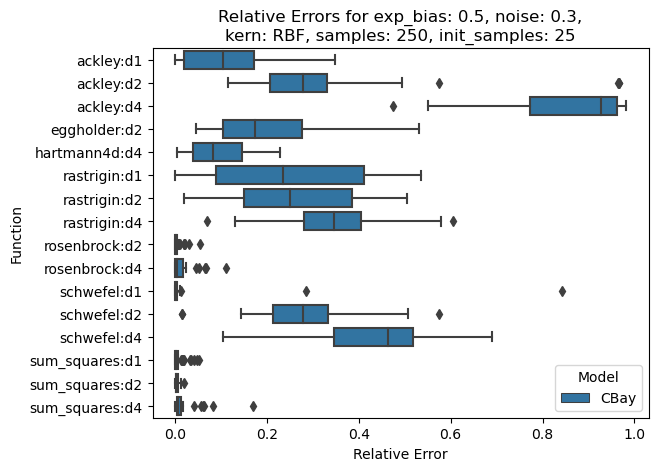

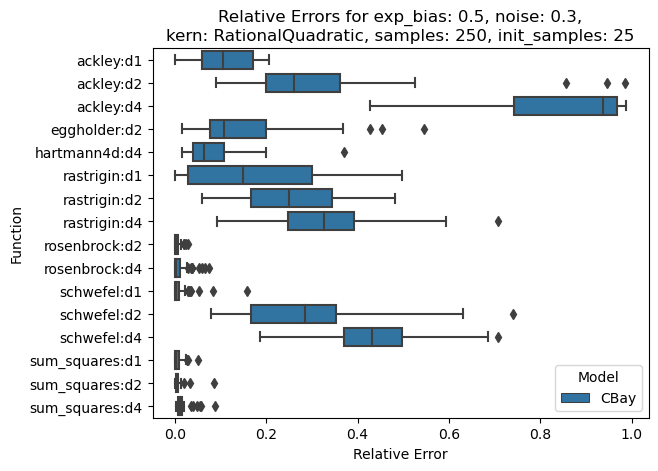

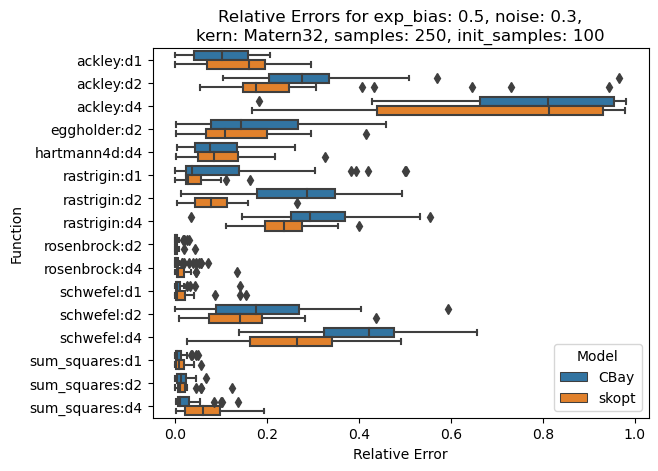

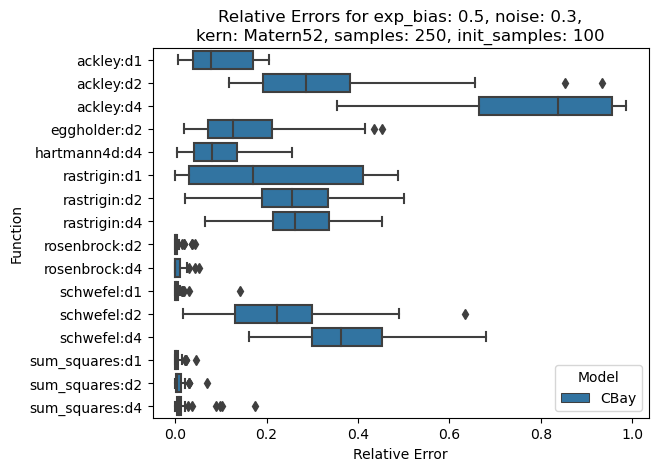

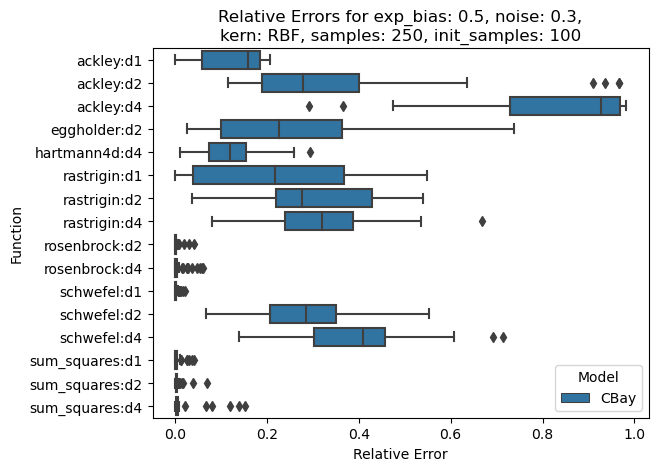

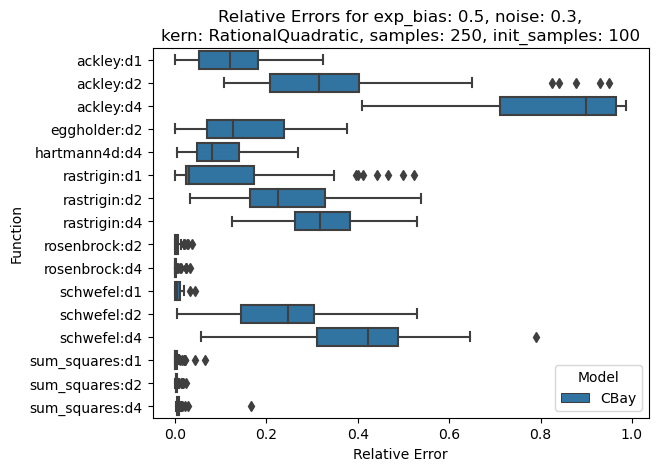

In [25]:
for iters in run_df["n_iters"].unique():
    for nl in run_df["noise_level"].unique():
        for eb in run_df["exp_bias"].unique():
            for init in run_df["n_init_samp"].unique():
                for k in run_df["kern"].unique():
                    df = run_df.loc[(run_df["exp_bias"] == eb) &
                                    (run_df["noise_level"] == nl) & 
                                    (run_df["kern"] == k) &
                                    (run_df["n_iters"] == iters) &
                                    (run_df["n_init_samp"] == init)
                                    ]
#                     print("eb", eb, "nl", nl, "k", k, "iters", iters, "init", init)
                    if len(df) == 0: continue
#                     if len(df["Model"].unique()) < 2: continue
#                     print(df.head())
                    plt.figure()
                    sns.boxplot(y="Function",
                                x="Relative Error",
                                hue="Model",
                                data=df,
                                # notch=True,
                                # bootstrap=2000
                                orient="h"
                                )
                    title = f"Relative Errors for exp_bias: {eb}, noise: {nl},\nkern: {k}, samples: {iters}, init_samples: {init}"
#                     print(title)
                    plt.title(title)
plt.show()